# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [36]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")

In [38]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [42]:
# Try loading one file

df = pd.read_parquet(r'D:\AI_ML_Course\excel\EDA Assignment - NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

# Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [646]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthlysam data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'D:\AI_ML_Course\excel\EDA Assignment - NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        file_data = pd.read_parquet(file_path)
        file_data["date"] = file_data["tpep_pickup_datetime"].dt.date
        file_data["hour"] = file_data["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for d in file_data["date"].unique():
            
            # Iterate through each hour of the selected date
            for h in file_data[file_data["date"]==d]["hour"].unique():
                rows = file_data[(file_data["date"] == d) & (file_data["hour"] == h)]
                # Sample 5% of the hourly data randomly
                sample = rows.sample(frac=0.01,random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data,sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(df.shape)

(379268, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [648]:
# Store the df in csv/parquet
df.to_parquet('combined_file.parquet');

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [2850]:
# Load the new data file

df = pd.read_parquet('combined_file.parquet')

In [2852]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [2854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [383]:
# Fix the index and drop any columns that are not needed
# index has already been fixed while concating the records and not dropping any column

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [2856]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].where(~df['Airport_fee'].isna(), df['airport_fee'])

In [2858]:
# delete the column airport_fee since its values have been copied to Airport_fee
df.drop(columns=['airport_fee'], inplace=True)

In [2860]:
# checking to see the airport_fee column is dropped
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date hour  \
0                    1.0         41.15                   0.0  2023-01-01    0   
1                    1.0         15.48                   2.5  2023-01-01    0   
2                    1.0         16.40                   2.5  2023-01-01    0   
3                    1.0         11.50                   2.5  2023-01-01    0   
4                    1.0         35.57                   NaN  2023-01-01    0   

   Airport_fee  
0         1.25  
1         0.00  
2         0.00  
3         0.00  
4          NaN  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [2862]:
# check where values of fare amount are negative
df[df["fare_amount"]<0] 
# 0 rows returned for negative fare amount

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [397]:
# Analyse RatecodeID for the negative fare amounts
# since there are zero records fetched for negative fare amount could not identify the ratecodeid column for those records

In [2864]:
# Find which columns have negative values
# extra column has 1 negative records
df[df["extra"]<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
60322         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
60322            0.0         1.0                  N           265   

       DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
60322           265             2  ...   -2.5      0.0         0.0   

       tolls_amount  improvement_surcharge  total_amount  \
60322           0.0                    1.0           4.0   

       congestion_surcharge        date hour  Airport_fee  
60322                   0.0  2023-10-27   14          0.0  

[1 rows x 21 columns]

In [2866]:
# mta_tax column has 15 negative records
df[df["mta_tax"]<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68433          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
72100          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
75533          2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
91375          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
108242         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
129885         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
136147         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
192497         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
197457         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
199718         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
262686         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
291009         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
309089         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
321723         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   
347019         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68433            0.21         2.0                  N           246   
72100            0.48         1.0                  N            75   
75533            0.79         1.0                  N           143   
91375            0.05         2.0                  N           132   
108242           0.00         2.0                  N           107   
129885           0.02         1.0                  N           161   
136147           0.00         1.0                  N           231   
192497           1.09         2.0                  N            90   
197457           1.38         2.0                  N           249   
199718           0.01         2.0                  N           237   
262686           3.61         1.0                  N            68   
291009           8.35         1.0                  N           132   
309089           0.00         1.0                  N           193   
321723          17.37         2.0                  N           132   
347019           0.66         1.0                  N           113   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
68433            246             2  ...    0.0     -0.5         0.0   
72100             75             2  ...    0.0     -0.5         0.0   
75533            143             2  ...    0.0     -0.5         0.0   
91375            132             4  ...    0.0     -0.5         0.0   
108242           137             2  ...    0.0     -0.5         0.0   
129885           161             2  ...    0.0     -0.5         0.0   
136147           231             2  ...    0.0     -0.5         0.0   
192497           170             2  ...    0.0     -0.5         0.0   
197457           186             2  ...    0.0     -0.5         0.0   
199718           237             2  ...    0.0     -0.5         0.0   
262686           232             2  ...    0.0     -0.5         0.0   
291009           222             2  ...    0.0     -0.5         0.0   
309089           193             2  ...    0.0     -0.5         0.0   
321723           132             2  ...    0.0     -0.5         0.0   
347019           234             2  ...    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
68433            0.0                   -1.0         -4.00   
72100            0.0                   -1.0         -1.50   
75533            0.0                   -1.0         -4.00   
91375            0.0                   -1.0         -3.25   
108242           0.0                   -1.0         -4.00   
129885           0.0                   -1.0         -4.00   
136147           0.0                   -1.

In [2868]:
# improvement_surcharge column has 15 negative records
df[df["improvement_surcharge"]<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68433          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
72100          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
75533          2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
91375          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
108242         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
129885         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
136147         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
192497         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
197457         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
199718         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
262686         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
291009         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
309089         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
321723         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   
347019         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68433            0.21         2.0                  N           246   
72100            0.48         1.0                  N            75   
75533            0.79         1.0                  N           143   
91375            0.05         2.0                  N           132   
108242           0.00         2.0                  N           107   
129885           0.02         1.0                  N           161   
136147           0.00         1.0                  N           231   
192497           1.09         2.0                  N            90   
197457           1.38         2.0                  N           249   
199718           0.01         2.0                  N           237   
262686           3.61         1.0                  N            68   
291009           8.35         1.0                  N           132   
309089           0.00         1.0                  N           193   
321723          17.37         2.0                  N           132   
347019           0.66         1.0                  N           113   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
68433            246             2  ...    0.0     -0.5         0.0   
72100             75             2  ...    0.0     -0.5         0.0   
75533            143             2  ...    0.0     -0.5         0.0   
91375            132             4  ...    0.0     -0.5         0.0   
108242           137             2  ...    0.0     -0.5         0.0   
129885           161             2  ...    0.0     -0.5         0.0   
136147           231             2  ...    0.0     -0.5         0.0   
192497           170             2  ...    0.0     -0.5         0.0   
197457           186             2  ...    0.0     -0.5         0.0   
199718           237             2  ...    0.0     -0.5         0.0   
262686           232             2  ...    0.0     -0.5         0.0   
291009           222             2  ...    0.0     -0.5         0.0   
309089           193             2  ...    0.0     -0.5         0.0   
321723           132             2  ...    0.0     -0.5         0.0   
347019           234             2  ...    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
68433            0.0                   -1.0         -4.00   
72100            0.0                   -1.0         -1.50   
75533            0.0                   -1.0         -4.00   
91375            0.0                   -1.0         -3.25   
108242           0.0                   -1.0         -4.00   
129885           0.0                   -1.0         -4.00   
136147           0.0                   -1.

In [2870]:
# total_amount column has 15 negative records
df[df["total_amount"]<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68433          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
72100          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
75533          2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
91375          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
108242         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
129885         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
136147         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
192497         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
197457         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
199718         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
262686         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
291009         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
309089         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
321723         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   
347019         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68433            0.21         2.0                  N           246   
72100            0.48         1.0                  N            75   
75533            0.79         1.0                  N           143   
91375            0.05         2.0                  N           132   
108242           0.00         2.0                  N           107   
129885           0.02         1.0                  N           161   
136147           0.00         1.0                  N           231   
192497           1.09         2.0                  N            90   
197457           1.38         2.0                  N           249   
199718           0.01         2.0                  N           237   
262686           3.61         1.0                  N            68   
291009           8.35         1.0                  N           132   
309089           0.00         1.0                  N           193   
321723          17.37         2.0                  N           132   
347019           0.66         1.0                  N           113   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
68433            246             2  ...    0.0     -0.5         0.0   
72100             75             2  ...    0.0     -0.5         0.0   
75533            143             2  ...    0.0     -0.5         0.0   
91375            132             4  ...    0.0     -0.5         0.0   
108242           137             2  ...    0.0     -0.5         0.0   
129885           161             2  ...    0.0     -0.5         0.0   
136147           231             2  ...    0.0     -0.5         0.0   
192497           170             2  ...    0.0     -0.5         0.0   
197457           186             2  ...    0.0     -0.5         0.0   
199718           237             2  ...    0.0     -0.5         0.0   
262686           232             2  ...    0.0     -0.5         0.0   
291009           222             2  ...    0.0     -0.5         0.0   
309089           193             2  ...    0.0     -0.5         0.0   
321723           132             2  ...    0.0     -0.5         0.0   
347019           234             2  ...    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
68433            0.0                   -1.0         -4.00   
72100            0.0                   -1.0         -1.50   
75533            0.0                   -1.0         -4.00   
91375            0.0                   -1.0         -3.25   
108242           0.0                   -1.0         -4.00   
129885           0.0                   -1.0         -4.00   
136147           0.0                   -1.

In [2872]:
# congestion_surcharge column has 10 negative records
df[df["congestion_surcharge"]<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68433          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
75533          2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
108242         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
129885         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
192497         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
197457         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
199718         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
262686         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
321723         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   
347019         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68433            0.21         2.0                  N           246   
75533            0.79         1.0                  N           143   
108242           0.00         2.0                  N           107   
129885           0.02         1.0                  N           161   
192497           1.09         2.0                  N            90   
197457           1.38         2.0                  N           249   
199718           0.01         2.0                  N           237   
262686           3.61         1.0                  N            68   
321723          17.37         2.0                  N           132   
347019           0.66         1.0                  N           113   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
68433            246             2  ...    0.0     -0.5         0.0   
75533            143             2  ...    0.0     -0.5         0.0   
108242           137             2  ...    0.0     -0.5         0.0   
129885           161             2  ...    0.0     -0.5         0.0   
192497           170             2  ...    0.0     -0.5         0.0   
197457           186             2  ...    0.0     -0.5         0.0   
199718           237             2  ...    0.0     -0.5         0.0   
262686           232             2  ...    0.0     -0.5         0.0   
321723           132             2  ...    0.0     -0.5         0.0   
347019           234             2  ...    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
68433            0.0                   -1.0         -4.00   
75533            0.0                   -1.0         -4.00   
108242           0.0                   -1.0         -4.00   
129885           0.0                   -1.0         -4.00   
192497           0.0                   -1.0         -4.00   
197457           0.0                   -1.0         -4.00   
199718           0.0                   -1.0         -4.00   
262686           0.0                   -1.0         -4.00   
321723           0.0                   -1.0         -5.75   
347019           0.0                   -1.0         -4.00   

        congestion_surcharge        date hour  Airport_fee  
68433                   -2.5  2023-11-03   15         0.00  
75533                   -2.5  2023-11-09   18         0.00  
108242                  -2.5  2023-12-09    8         0.00  
129885                  -2.5  2023-12-29   17         0.00  
192497                  -2.5  2023-06-25    5         0.00  
197457                  -2.5  2023-06-30   21         0.00  
199718                  -2.5  2023-08-02   16         0.00  
262686                  -2.5  2023-04-12   19         0.00  
321723                  -2.5  2023-05-31   14        -1.75  
347019                  -2.5  2023-07-27   17         0.00  

[10 rows x 21 columns]

In [2874]:
# Airport_fee column has 3 negative records
df[df["Airport_fee"]<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
91375          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
291009         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
321723         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
91375            0.05         2.0                  N           132   
291009           8.35         1.0                  N           132   
321723          17.37         2.0                  N           132   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
91375            132             4  ...    0.0     -0.5         0.0   
291009           222             2  ...    0.0     -0.5         0.0   
321723           132             2  ...    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
91375            0.0                   -1.0         -3.25   
291009           0.0                   -1.0         -3.25   
321723           0.0                   -1.0         -5.75   

        congestion_surcharge        date hour  Airport_fee  
91375                    0.0  2023-11-22   15        -1.75  
291009                   0.0  2023-05-09   17        -1.75  
321723                  -2.5  2023-05-31   14        -1.75  

[3 rows x 21 columns]

In [ ]:
# fix these negative values

In [2876]:
df['extra'].describe() # the min value is -2.500000

count    379268.000000
mean          1.582689
std           1.821118
min          -2.500000
25%           0.000000
50%           1.000000
75%           2.500000
max          14.250000
Name: extra, dtype: float64

In [2878]:
# substituting extra negative records with the mean value i.e. 1.58
mean = round(df['extra'].mean(),2)
df['extra'] = df['extra'].apply(lambda x: mean if x < 0 else x)

In [2880]:
df['extra'].describe() # min value has been changed from negative to 0 after replacing negative values with mean

count    379268.000000
mean          1.582699
std           1.821106
min           0.000000
25%           0.000000
50%           1.000000
75%           2.500000
max          14.250000
Name: extra, dtype: float64

In [2882]:
df['mta_tax'].describe() # the min value is -0.500000

count    379268.000000
mean          0.495354
std           0.048617
min          -0.500000
25%           0.500000
50%           0.500000
75%           0.500000
max           4.000000
Name: mta_tax, dtype: float64

In [2884]:
# substituting mta_tax negative records with the mean value i.e. 0.5
mean = round(df['mta_tax'].mean(),2)
df['mta_tax'] = df['mta_tax'].apply(lambda x: mean if x < 0 else x)

In [2886]:
df['mta_tax'].describe() # min value has been set from negative to 0

count    379268.000000
mean          0.495393
std           0.048212
min           0.000000
25%           0.500000
50%           0.500000
75%           0.500000
max           4.000000
Name: mta_tax, dtype: float64

In [2888]:
df['improvement_surcharge'].describe() # the min value is -1.000000

count    379268.000000
mean          0.998977
std           0.031027
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: improvement_surcharge, dtype: float64

In [2890]:
# substituting improvement_surcharge negative records with the mean value i.e. 1.0
mean = round(df['improvement_surcharge'].mean(),2)
df['improvement_surcharge'] = df['improvement_surcharge'].apply(lambda x: mean if x < 0 else x)

In [2892]:
df['improvement_surcharge'].describe() # the min value is -1.000000 to 0

count    379268.000000
mean          0.999056
std           0.028366
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: improvement_surcharge, dtype: float64

In [2894]:
df['total_amount'].describe() # the min value is -5.750000

count    379268.000000
mean         29.222007
std         233.532444
min          -5.750000
25%          15.960000
50%          21.000000
75%          30.750000
max      143167.450000
Name: total_amount, dtype: float64

In [2896]:
# substituting total_amount negative records with the mean value i.e. 29.22
mean = round(df['total_amount'].mean(),2)
df['total_amount'] = df['total_amount'].apply(lambda x: mean if x < 0 else x)

In [2898]:
df['total_amount'].describe() # the min value is -5.750000 to 0

count    379268.000000
mean         29.223302
std         233.532353
min           0.000000
25%          15.960000
50%          21.000000
75%          30.750000
max      143167.450000
Name: total_amount, dtype: float64

In [2900]:
df['congestion_surcharge'].describe() # the min value is -2.500000

count    366326.000000
mean          2.308804
std           0.664662
min          -2.500000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [2902]:
# substituting congestion_surcharge negative records with the mean value i.e. 2.31
mean = round(df['congestion_surcharge'].mean(),2)
df['congestion_surcharge'] = df['congestion_surcharge'].apply(lambda x: mean if x < 0 else x)

In [2904]:
df['congestion_surcharge'].describe() # the min value is -2.500000 to 0

count    366326.000000
mean          2.308935
std           0.664187
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [2906]:
df['Airport_fee'].describe() # the min value is -1.750000

count    366326.000000
mean          0.141878
std           0.463218
min          -1.750000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: Airport_fee, dtype: float64

In [2908]:
# substituting Airport_fee negative records with the mean value i.e. 0.14
mean = round(df['Airport_fee'].mean(),2)
df['Airport_fee'] = df['Airport_fee'].apply(lambda x: mean if x < 0 else x)

In [2910]:
df['Airport_fee'].describe() # the min value is -1.750000 to 0

count    366326.000000
mean          0.141894
std           0.463187
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: Airport_fee, dtype: float64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [2912]:
# Find the proportion of missing values in each column
print('Proportion of missing values in passenger_count is: ',round(df['passenger_count'].isna().sum()/len(df)*100,2))
print('Proportion of missing values in RatecodeID is: ',round(df['RatecodeID'].isna().sum()/len(df)*100,2))
print('Proportion of missing values in store_and_fwd_flag is: ',round(df['store_and_fwd_flag'].isna().sum()/len(df)*100,2))
print('Proportion of missing values in congestion_surcharge is: ',round(df['congestion_surcharge'].isna().sum()/len(df)*100,2))
print('Proportion of missing values in Airport_fee is: ',round(df['Airport_fee'].isna().sum()/len(df)*100,2))
# for rest of the columns its 0

Proportion of missing values in passenger_count is:  3.41
Proportion of missing values in RatecodeID is:  3.41
Proportion of missing values in store_and_fwd_flag is:  3.41
Proportion of missing values in congestion_surcharge is:  3.41
Proportion of missing values in Airport_fee is:  3.41


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [2914]:
# Display the rows with null values
df[df['passenger_count'].isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...          ...                  ...                   ...              ...   
379058         2  2023-09-30 19:45:46   2023-09-30 20:03:29              NaN   
379068         2  2023-09-30 19:06:52   2023-09-30 19:26:11              NaN   
379075         1  2023-09-30 19:40:22   2023-09-30 19:48:06              NaN   
379138         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
379215         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
379058           2.78         NaN               None           137   
379068           1.93         NaN               None           239   
379075           0.00         NaN               None           239   
379138           0.00         NaN               None           249   
379215           0.00         NaN               None            48   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
379058           231             0  ...    0.0      0.5        6.27   
379068           230             0  ...    0.0      0.5        0.00   
379075           239             0  ...    0.0      0.5        0.00   
379138            87             0  ...    0.0      0.5        0.00   
379215           249             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379058          0.00                    1.0         37.60   
379068          0.00                    1.0         24.02   
379075          0.00                    1.0         11.69   
379138          0.00                    1.0         23.71   
379215          0.00                    1.0         25.88   

        congestion_surcharge        date hour  Airport_fee  
4                        NaN  2023-01-01    0          NaN  
15                       NaN  2023-01-01    0          NaN  
42                       NaN  2023-01-01    0          NaN  
43                       NaN  2023-01-01    0          NaN  
46                       NaN  2023-01-01    0          NaN  
...                      ...         ...  ...          ...  
379058                   NaN  2023-09-30   19          NaN  
379068                   NaN  2023-09-30   19          NaN  
379075                   NaN  2023-09-30   19          NaN  
379138    

In [2916]:
# finding the median of passenger_count since mean is 1.37 which doesnt make sense as a passenger count because the passenger cannot be in fractions.
round(df['passenger_count'].median(),2)

1.0

In [2918]:
# finding the mode of passenger_count
df['passenger_count'].value_counts()

passenger_count
1.0    276107
2.0     55136
3.0     13712
4.0      7613
0.0      5824
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [2920]:
# Impute NaN values in 'passenger_count'
# since both the values of median and mode are same for passenger_count imputing Nan with 1.0 in 'passenger_count'
median = round(df['passenger_count'].median(),2)
df['passenger_count'].fillna(median, inplace=True)

In [2922]:
df['passenger_count'].isna().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [2924]:
len(df[df['passenger_count']==0])

5824

In [2926]:
# since there are zero passengers removing those rows as the trip doesnt make sense if there are no passengers travelling in the cab
df = df[df['passenger_count']!=0]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [2928]:
# Display the rows with null values
df[df['RatecodeID'].isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...          ...                  ...                   ...              ...   
379058         2  2023-09-30 19:45:46   2023-09-30 20:03:29              1.0   
379068         2  2023-09-30 19:06:52   2023-09-30 19:26:11              1.0   
379075         1  2023-09-30 19:40:22   2023-09-30 19:48:06              1.0   
379138         1  2023-09-30 21:50:20   2023-09-30 22:06:38              1.0   
379215         1  2023-09-30 22:53:15   2023-09-30 23:10:04              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
379058           2.78         NaN               None           137   
379068           1.93         NaN               None           239   
379075           0.00         NaN               None           239   
379138           0.00         NaN               None           249   
379215           0.00         NaN               None            48   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
379058           231             0  ...    0.0      0.5        6.27   
379068           230             0  ...    0.0      0.5        0.00   
379075           239             0  ...    0.0      0.5        0.00   
379138            87             0  ...    0.0      0.5        0.00   
379215           249             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379058          0.00                    1.0         37.60   
379068          0.00                    1.0         24.02   
379075          0.00                    1.0         11.69   
379138          0.00                    1.0         23.71   
379215          0.00                    1.0         25.88   

        congestion_surcharge        date hour  Airport_fee  
4                        NaN  2023-01-01    0          NaN  
15                       NaN  2023-01-01    0          NaN  
42                       NaN  2023-01-01    0          NaN  
43                       NaN  2023-01-01    0          NaN  
46                       NaN  2023-01-01    0          NaN  
...                      ...         ...  ...          ...  
379058                   NaN  2023-09-30   19          NaN  
379068                   NaN  2023-09-30   19          NaN  
379075                   NaN  2023-09-30   19          NaN  
379138    

In [2930]:
# finding the mode of RatecodeID
df['RatecodeID'].value_counts()

RatecodeID
1.0     340299
2.0      14169
99.0      2128
5.0       2026
3.0       1162
4.0        718
Name: count, dtype: int64

In [2932]:
# Fix missing values in 'RatecodeID'
# replacing missing values with mode for RatecodeID because it is a categorical column
mode = df['RatecodeID'].value_counts().index[0]
df['RatecodeID'].fillna(mode, inplace=True)

In [2934]:
# the count for 1.0 has been increased after filling missing values 1700728+64874
df['RatecodeID'].value_counts()

RatecodeID
1.0     353241
2.0      14169
99.0      2128
5.0       2026
3.0       1162
4.0        718
Name: count, dtype: int64

In [2622]:
df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [2936]:
# Display the count of rows with null values
df['congestion_surcharge'].isna().sum()

12942

In [2938]:
# finding the mean for congestion_surcharge
round(df['congestion_surcharge'].mean(),2)

2.31

In [2940]:
# handle null values in congestion_surcharge
mean = round(df['congestion_surcharge'].mean(),2)
df['congestion_surcharge'].fillna(mean, inplace=True)

In [2942]:
df['congestion_surcharge'].isna().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [2944]:
# Handle any remaining missing values
df['store_and_fwd_flag'].isna().sum()

12942

In [2946]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    358530
Y      1972
Name: count, dtype: int64

In [2948]:
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].value_counts().index[0], inplace=True)

In [2950]:
df['store_and_fwd_flag'].isna().sum()

0

In [2952]:
df['Airport_fee'].isna().sum()

12942

In [2954]:
round(df['Airport_fee'].mean(),2)

0.14

In [2956]:
# replacing null or Nan values of Airport_fee to mean i.e. 0.14
df['Airport_fee'].fillna(round(df['Airport_fee'].mean(),2), inplace=True)

In [2958]:
df['Airport_fee'].isna().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [2960]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
for col in ['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra',
           'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']:
    print('*******************',col.upper(),'*********************')
    Q1= df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    print('lower bound: ', lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print('upper bound: ', upper_bound)
    outliers = len(df[(df['total_amount']<lower_bound) | (df['total_amount']> upper_bound)])
    print('Outlier count are: ', outliers)


******************* PASSENGER_COUNT *********************
lower bound:  1.0
upper bound:  1.0
Outlier count are:  373431
******************* TRIP_DISTANCE *********************
lower bound:  -2.4749999999999996
upper bound:  6.924999999999999
Outlier count are:  372325
******************* PULOCATIONID *********************
lower bound:  -21.0
upper bound:  387.0
Outlier count are:  18
******************* DOLOCATIONID *********************
lower bound:  -68.5
upper bound:  415.5
Outlier count are:  14
******************* FARE_AMOUNT *********************
lower bound:  -9.599999999999998
upper bound:  40.8
Outlier count are:  58657
******************* EXTRA *********************
lower bound:  -3.75
upper bound:  6.25
Outlier count are:  372478
******************* MTA_TAX *********************
lower bound:  0.5
upper bound:  0.5
Outlier count are:  373444
******************* TIP_AMOUNT *********************
lower bound:  -4.13
upper bound:  9.55
Outlier count are:  367767
****************

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [2962]:
# remove passenger_count > 6
print('Count of rows for dataframe before removing passenger_count > 6: ', len(df))
df = df[df['passenger_count']<=6]
print('Count of rows for dataframe after removing passenger_count > 6: ', len(df))

Count of rows for dataframe before removing passenger_count > 6:  373444
Count of rows for dataframe after removing passenger_count > 6:  373439


In [2964]:
# Continue with outlier handling
# removed rows having trip_distance == 0 and fare_amount greater than 300.
df = df[(df['trip_distance']>0) & (df['fare_amount']<=300)]

In [2966]:
#Entries where trip_distance is more than 250 miles.
df[df['trip_distance']>250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
134003         2  2023-03-02 15:45:34   2023-03-02 16:00:45              1.0   
179495         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
243196         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
246117         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
301827         2  2023-05-12 15:12:50   2023-05-12 16:03:58              1.0   
316456         2  2023-05-25 11:10:00   2023-05-25 11:35:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
134003        9674.01         1.0                  N           161   
179495       22528.82         1.0                  N           116   
243196        8645.77         1.0                  N           238   
246117        6284.45         1.0                  N           186   
301827        9678.78         1.0                  N           138   
316456       10433.95         1.0                  N           116   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
134003            68             1  ...    0.0      0.5        2.00   
179495           239             0  ...    0.0      0.5        0.37   
243196           230             0  ...    0.0      0.5        4.34   
246117           236             0  ...    0.0      0.5        0.00   
301827           116             2  ...    0.0      0.5        0.00   
316456           238             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
134003          0.00                    1.0         20.20   
179495          0.00                    1.0         21.79   
243196          0.00                    1.0         21.68   
246117          0.00                    1.0         20.00   
301827          6.55                    1.0         55.15   
316456          0.00                    1.0         25.25   

        congestion_surcharge        date hour  Airport_fee  
134003                  2.50  2023-03-02   15         0.00  
179495                  2.31  2023-06-13    9         0.14  
243196                  2.31  2023-02-17    7         0.14  
246117                  2.31  2023-02-19   22         0.14  
301827                  0.00  2023-05-12   15         0.00  
316456                  2.31  2023-05-25   11         0.14  

[6 rows x 21 columns]

In [2968]:
# removing the rows where trip_distance is more than 250 miles.
df = df[df['trip_distance']<=250]

In [2970]:
df[df['trip_distance']>250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [2972]:
# remove payment_type as 0
df = df[df['payment_type']!=0]

In [2974]:
df[df['payment_type']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [784]:
# Do any columns need standardising?
# No

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [2976]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: `Categorical`
* `tpep_pickup_datetime`: `Can be used both as Numerical and Categorical`
* `tpep_dropoff_datetime`: `Can be used both as Numerical and Categorical`
* `passenger_count`: `Numerical`
* `trip_distance`: `Numerical`
* `RatecodeID`: `Categorical`
* `PULocationID`: `Categorical`
* `DOLocationID`: `Categorical`
* `payment_type`: `Categorical`
* `pickup_hour`: `Numerical`
* `trip_duration`: `Numercial`


The following monetary parameters belong in the same category, is it categorical or numerical?

`Numerical`

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Figure size 1000x1000 with 0 Axes>

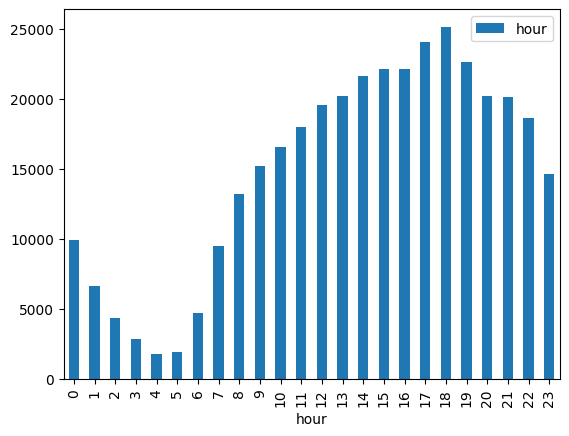

In [2978]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=[10,10])
df.groupby(by=['hour']).aggregate({'hour':'count'}).plot.bar()
plt.show()

In [ ]:
# inference from the above graph: demand picks up from 6am in the morning and keeps going up till 7pm and peaks at 6 pm and then it starts decreasing.

In [2982]:
# creating column days of the week in df dataframe
df['pickup_days_of_the_week'] = df['tpep_pickup_datetime'].dt.day_name()

In [2984]:
df['pickup_days_of_the_week'].value_counts()

pickup_days_of_the_week
Thursday     56007
Wednesday    54806
Friday       52687
Tuesday      51790
Saturday     51671
Sunday       44715
Monday       44419
Name: count, dtype: int64

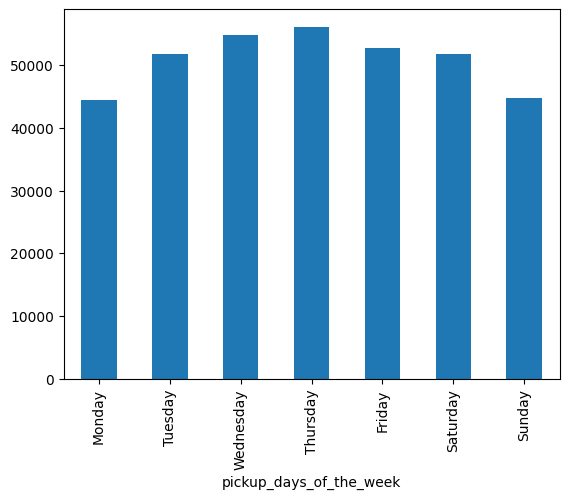

In [2986]:
# Find and show the daily trends in taxi pickups (days of the week)
val_counts = df['pickup_days_of_the_week'].value_counts()
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_df = val_counts.reindex([day for day in custom_order if day in val_counts.index])
sorted_df.plot.bar()
plt.show()

In [ ]:
# inference from the above graph: demand picks up from tuesday keeps going up thursday while peaking on thursday and then it starts decreasing.

In [2988]:
# creating column days of the week in df dataframe
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

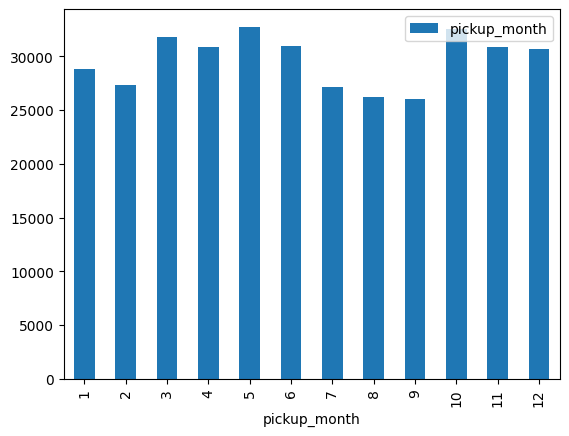

In [2990]:
# Show the monthly trends in pickups
df.groupby(by=['pickup_month']).aggregate({'pickup_month':'count'}).plot.bar()
plt.show()

In [389]:
# inference from the above graph: people tend to move out in spring and fall more often then summer and winters.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [2992]:
# Analyse the above parameters
print('Zero or Negative values for fare_amount: ', len(df[df['fare_amount']<=0]))
print('Zero or Negative values for tip_amount: ', len(df[df['tip_amount']<=0]))
print('Zero or Negative values for total_amount: ', len(df[df['total_amount']<=0]))
print('Zero or Negative values for trip_distance: ', len(df[df['trip_distance']<=0]))

Zero or Negative values for fare_amount:  68
Zero or Negative values for tip_amount:  77489
Zero or Negative values for total_amount:  14
Zero or Negative values for trip_distance:  0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [2994]:
# First fare amount
df = df[df['fare_amount']>0]

In [2996]:
df[df['fare_amount']<=0] # checking whether those records are removed or not

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee, pickup_days_of_the_week, pickup_month]
Index: []

[0 rows x 23 columns]

In [2998]:
# Total amount
df = df[df['total_amount']>0]

In [3000]:
df[df['total_amount']<=0] # checking whether those records are removed or not

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee, pickup_days_of_the_week, pickup_month]
Index: []

[0 rows x 23 columns]

In [3002]:
# tip amount
df = df[df['tip_amount']>0]

In [3004]:
df[df['tip_amount']<=0] # checking whether those records are removed or not

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee, pickup_days_of_the_week, pickup_month]
Index: []

[0 rows x 23 columns]

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [2694]:
# Create a df with non zero entries for the selected parameters.
# No records found with trip_distance as zero
# Answer: It is suitable to drop such cases of zero distance

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [3006]:
# Group data by month and analyse monthly revenue
month_amount = df.groupby(by=['pickup_month'])['total_amount'].sum().reset_index()

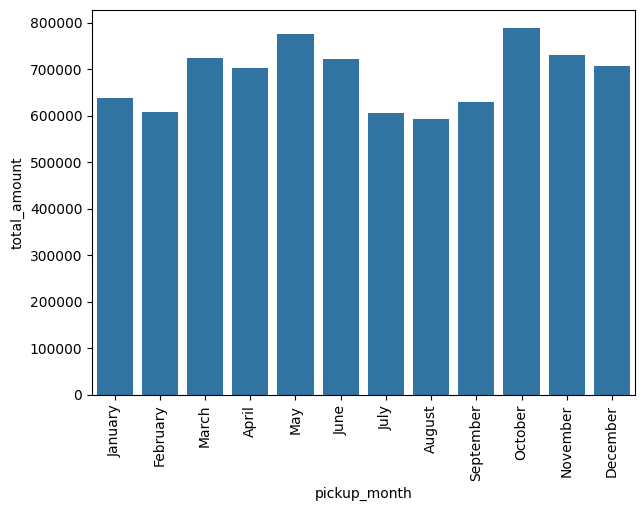

In [3008]:
# using line chart to show the trend
plt.figure(figsize=[7,5])
sns.barplot(data=month_amount, x= 'pickup_month', y='total_amount')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
                                          'December'], rotation=90)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [3010]:
# Calculate proportion of each quarter
def fillQuarter(month):
    quar = ''
    if month in [1,2,3]:
        quar = 'Q1'
    elif month in [4,5,6]:
        quar = 'Q2'
    elif month in [7,8,9]:
        quar = 'Q3'
    else:
        quar = 'Q4'
    return quar

df['quarter'] = df['pickup_month'].apply(lambda x: fillQuarter(x))

In [3012]:
quarterly_revenue = df.groupby(by=['quarter'])['total_amount'].sum().reset_index()
quarterly_revenue['quaterly_revenue_precentage'] = round(quarterly_revenue['total_amount']/round(df['total_amount'].sum(),2)*100,2)
quarterly_revenue

quarter  total_amount  quaterly_revenue_precentage
0      Q1    1971194.61                        23.96
1      Q2    2199548.71                        26.74
2      Q3    1827990.29                        22.22
3      Q4    2227243.79                        27.08

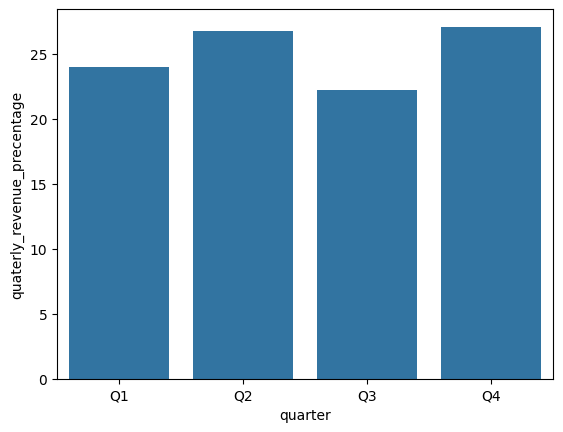

In [3014]:
# showing proportion of each quarter of the year in the revenue

sns.barplot(data=quarterly_revenue, x='quarter', y='quaterly_revenue_precentage')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [3016]:
df = df[df['trip_distance']<100]

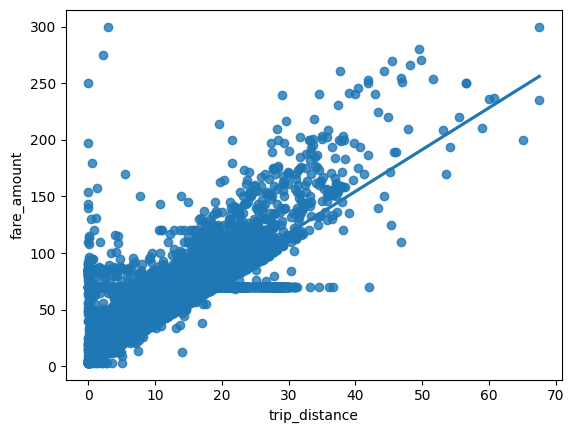

In [3018]:
# Show how trip fare is affected by distance

sns.regplot(data=df, x='trip_distance', y='fare_amount')
plt.show()

In [3020]:
df[['trip_distance', 'fare_amount']].corr()

trip_distance  fare_amount
trip_distance       1.000000     0.952029
fare_amount         0.952029     1.000000

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration

In [3022]:
# create new column trip_duration (in mins) for fetching the trip duration
df['trip_duration']= round((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60,2)

In [3024]:
df[['fare_amount', 'trip_duration']].corr() # weak correlation between trip_duration and fare_amount

fare_amount  trip_duration
fare_amount       1.000000       0.338681
trip_duration     0.338681       1.000000

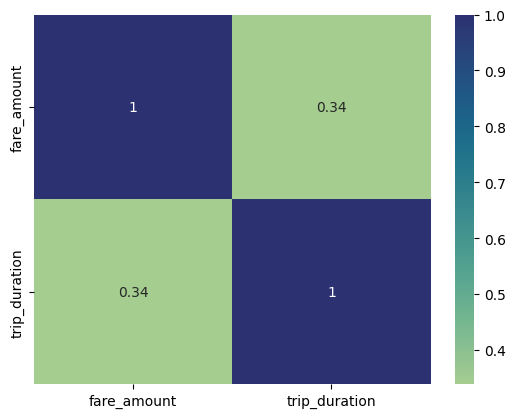

In [3026]:
sns.heatmap(df[['fare_amount', 'trip_duration']].corr(), cmap='crest', annot=True)
plt.show()

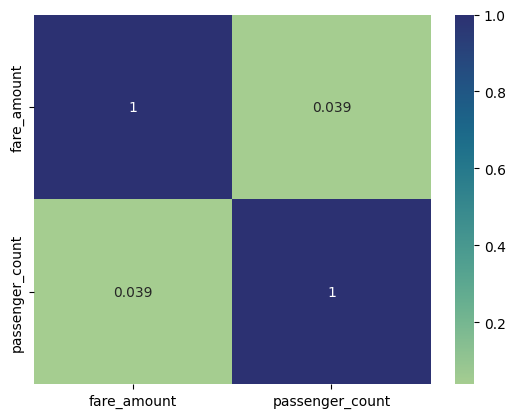

In [3028]:
# Show relationship between fare and number of passengers
# weak correlation between fare_amount and passenger_count

sns.heatmap(df[['fare_amount', 'passenger_count']].corr(), cmap='crest', annot=True)
plt.show()

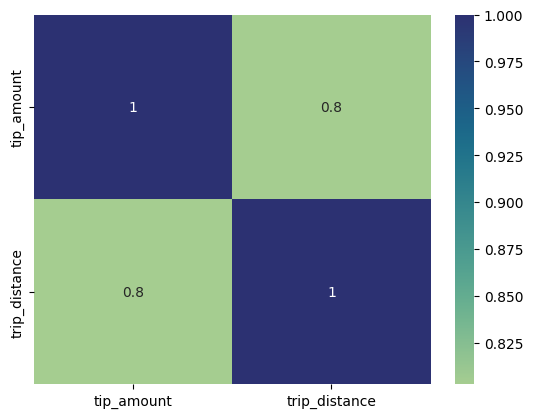

In [3030]:
# Show relationship between tip and trip distance

sns.heatmap(df[['tip_amount', 'trip_distance']].corr(), cmap='crest', annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [3032]:
# Analyse the distribution of different payment types (payment_type).
payment_df = df.groupby(by='payment_type').agg(count=('payment_type','count')).reset_index()
payment_df

payment_type   count
0             1  278588
1             2       5
2             3       1
3             4       5

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



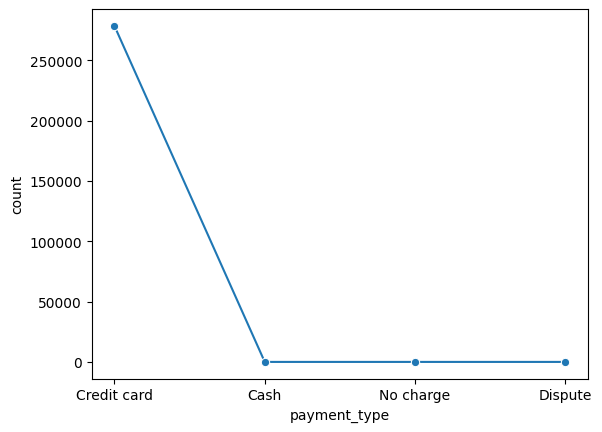

In [3034]:
sns.lineplot(data=payment_df, x='payment_type', y='count', marker='o')
plt.xticks([1,2,3,4],['Credit card', 'Cash', 'No charge', 'Dispute'])
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [571]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ------------------------ --------------- 9.7/16.2 MB 46.5 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 39.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 48.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 23.3 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [3036]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file(r'D:\AI_ML_Course\excel\EDA Assignment - NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

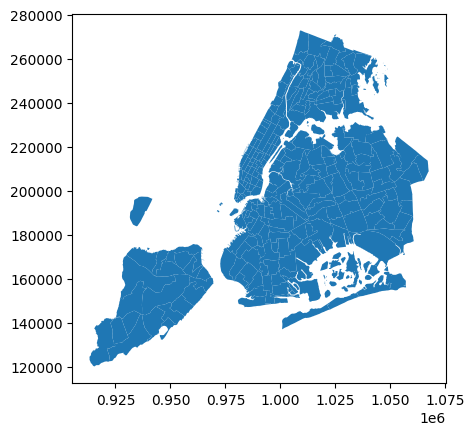

In [3038]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [3040]:
# Merge zones and trip records using locationID and PULocationID

df = df.merge(zones, how='inner', left_on='PULocationID', right_on='LocationID')
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'date', 'hour', 'Airport_fee',
       'pickup_days_of_the_week', 'pickup_month', 'quarter', 'trip_duration',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [3044]:
# Group data by location and calculate the number of trips

location_count = df.groupby(by='LocationID').agg(count=('LocationID','count')).sort_values(by='count', ascending=False).reset_index()
location_count.columns = ['LocationID', 'NumberofTrips']
location_count

LocationID  NumberofTrips
0           237          13859
1           161          13201
2           132          12667
3           236          12565
4           162          10493
..          ...            ...
161         196              1
162          64              1
163         165              1
164         167              1
165          26              1

[166 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [3046]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(location_count, how='inner', on='LocationID')
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           4    0.043567    0.000112            Alphabet City           4   
2           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
3           7    0.107417    0.000390                  Astoria           7   
4           9    0.099784    0.000338               Auburndale           9   
..        ...         ...         ...                      ...         ...   
162       258    0.089013    0.000366                Woodhaven         258   
163       260    0.133514    0.000422                 Woodside         260   
164       261    0.027120    0.000034       World Trade Center         261   
165       262    0.049064    0.000122           Yorkville East         262   
166       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
2    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
3           Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   
4           Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...   
..             ...                                                ...   
162         Queens  POLYGON ((1027223.758 190451.926, 1027233.961 ...   
163         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
164      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
165      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
166      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     NumberofTrips  
0                6  
1              265  
2                1  
3               48  
4                1  
..             ...  
162              1  
163             22  
164           1355  
165           3741  
166           5465  

[167 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

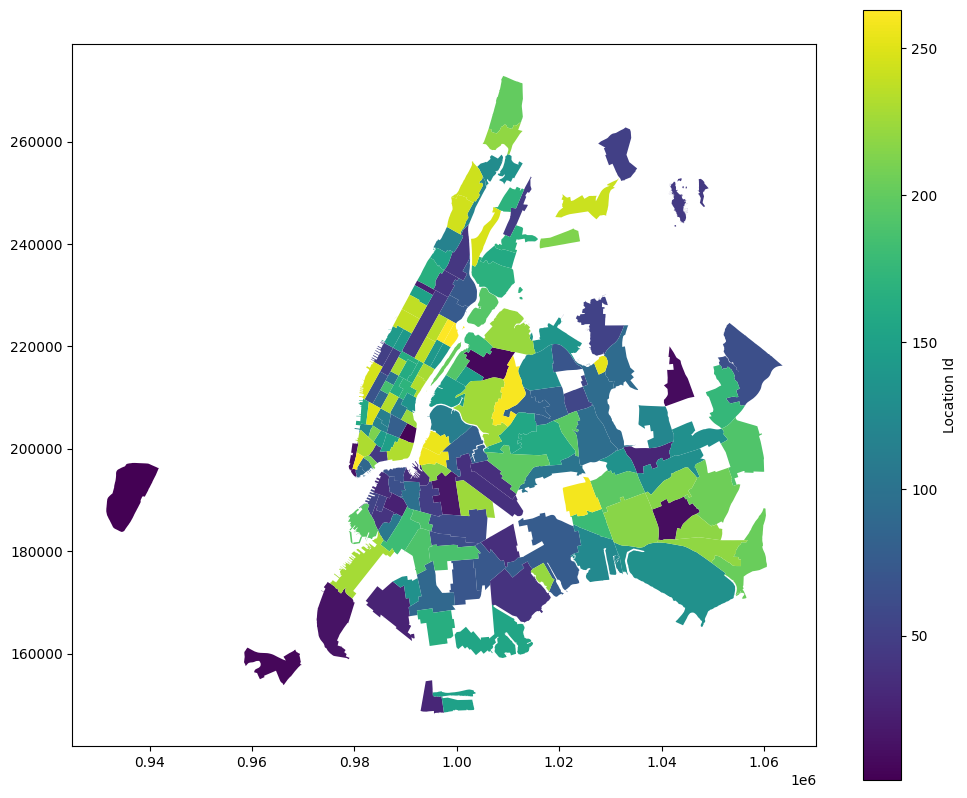

In [3048]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='LocationID',ax = ax,legend = True,legend_kwds = {'label': "Location Id", 'orientation': "vertical"})
plt.show()

In [3116]:
zones = zones.sort_values(by='NumberofTrips', ascending=False, axis=0)
zones

OBJECTID  Shape_Leng  Shape_Area                        zone  LocationID  \
150       237    0.042213    0.000096       Upper East Side South         237   
99        161    0.035804    0.000072              Midtown Center         161   
77        132    0.245479    0.002038                 JFK Airport         132   
149       236    0.044252    0.000103       Upper East Side North         236   
100       162    0.035270    0.000048                Midtown East         162   
..        ...         ...         ...                         ...         ...   
126       203    0.189938    0.000615                    Rosedale         203   
12         26    0.123548    0.000534                Borough Park          26   
127       205    0.141953    0.000766                Saint Albans         205   
136       220    0.106016    0.000313  Spuyten Duyvil/Kingsbridge         220   
31         51    0.095361    0.000396                  Co-Op City          51   

       borough                                           geometry  \
150  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
99   Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
77      Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
149  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
100  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..         ...                                                ...   
126     Queens  POLYGON ((1059828.741 184924.923, 1059759.66 1...   
12    Brooklyn  POLYGON ((988880.135 172984.8, 988969.535 1729...   
127     Queens  POLYGON ((1049028.76 195325.647, 1049096.735 1...   
136      Bronx  POLYGON ((1012377.01 263347.798, 1012114.369 2...   
31       Bronx  POLYGON ((1033780.661 255898.187, 1034198.589 ...   

     NumberofTrips  
150          13859  
99           13201  
77           12667  
149          12565  
100          10493  
..             ...  
126              1  
12               1  
127              1  
136              1  
31               1  

[167 rows x 8 columns]

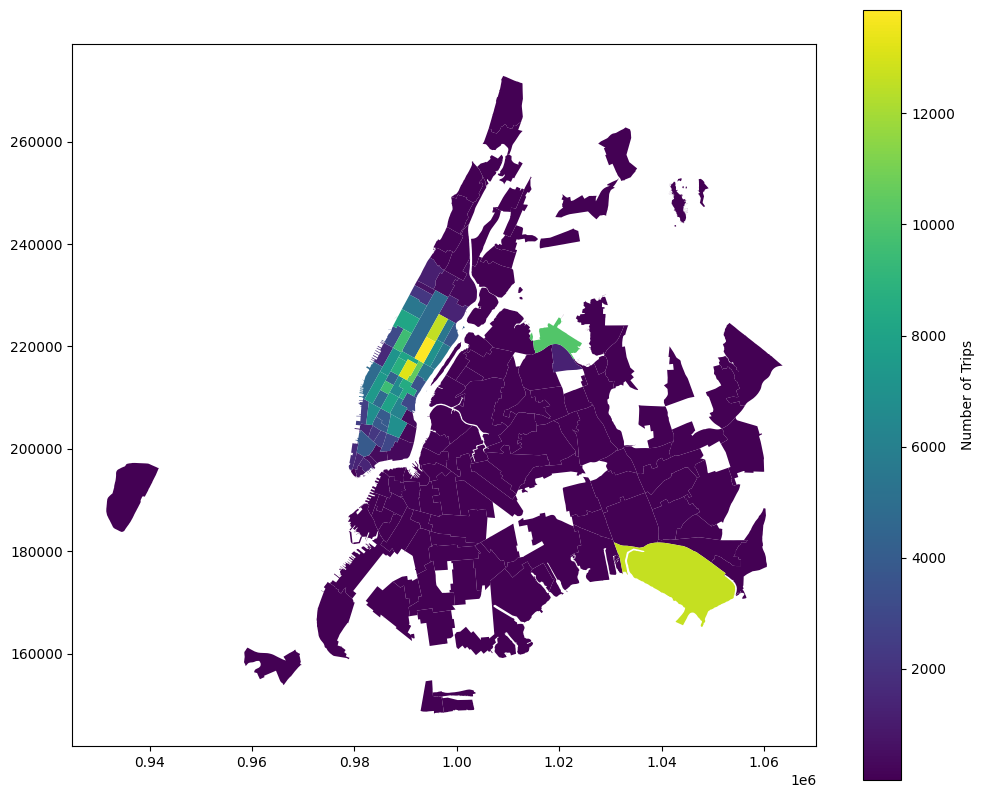

In [3114]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(column='NumberofTrips',ax = ax,legend = True ,legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [3128]:
# Find routes which have the slowest speeds at different times of the day
avg_time_grouped = df.groupby(by=['hour', 'PULocationID', 'DOLocationID']).agg(avg_trip_duration =('trip_duration','mean')).reset_index()
avg_time_grouped.head()

hour  PULocationID  DOLocationID  avg_trip_duration
0     0             4             4               1.42
1     0             4            13              11.50
2     0             4            17              21.15
3     0             4            33              14.88
4     0             4            43              22.50

In [3124]:
merged_data = avg_time_grouped.merge(df, on=['hour', 'PULocationID', 'DOLocationID'], how='inner')

In [3130]:
merged_data.head()

hour  PULocationID  DOLocationID  avg_trip_duration  VendorID  \
0     0             4             4               1.42         2   
1     0             4            13              11.50         2   
2     0             4            17              21.15         2   
3     0             4            33              14.88         1   
4     0             4            43              22.50         2   

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-03-04 00:05:05   2023-03-04 00:06:30              1.0           0.24   
1  2023-08-26 00:54:56   2023-08-26 01:06:26              1.0           4.16   
2  2023-12-06 00:41:31   2023-12-06 01:02:40              1.0           4.25   
3  2023-03-11 00:33:31   2023-03-11 00:48:24              2.0           3.90   
4  2023-08-13 00:58:25   2023-08-13 01:20:55              1.0           6.31   

   RatecodeID  ... pickup_month  quarter  trip_duration  OBJECTID  Shape_Leng  \
0         1.0  ...            3       Q1           1.42         4    0.043567   
1         1.0  ...            8       Q3          11.50         4    0.043567   
2         1.0  ...           12       Q4          21.15         4    0.043567   
3         1.0  ...            3       Q1          14.88         4    0.043567   
4         1.0  ...            8       Q3          22.50         4    0.043567   

   Shape_Area           zone  LocationID    borough  \
0    0.000112  Alphabet City           4  Manhattan   
1    0.000112  Alphabet City           4  Manhattan   
2    0.000112  Alphabet City           4  Manhattan   
3    0.000112  Alphabet City           4  Manhattan   
4    0.000112  Alphabet City           4  Manhattan   

                                            geometry  
0  POLYGON ((992073.467 203714.076, 992068.667 20...  
1  POLYGON ((992073.467 203714.076, 992068.667 20...  
2  POLYGON ((992073.467 203714.076, 992068.667 20...  
3  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  POLYGON ((992073.467 203714.076, 992068.667 20...  

[5 rows x 33 columns]

In [3132]:
merged_data['speed_kmph'] = round(merged_data['trip_distance']/(merged_data['avg_trip_duration']/60),2)
merged_data.head()

hour  PULocationID  DOLocationID  avg_trip_duration  VendorID  \
0     0             4             4               1.42         2   
1     0             4            13              11.50         2   
2     0             4            17              21.15         2   
3     0             4            33              14.88         1   
4     0             4            43              22.50         2   

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-03-04 00:05:05   2023-03-04 00:06:30              1.0           0.24   
1  2023-08-26 00:54:56   2023-08-26 01:06:26              1.0           4.16   
2  2023-12-06 00:41:31   2023-12-06 01:02:40              1.0           4.25   
3  2023-03-11 00:33:31   2023-03-11 00:48:24              2.0           3.90   
4  2023-08-13 00:58:25   2023-08-13 01:20:55              1.0           6.31   

   RatecodeID  ... quarter  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0         1.0  ...      Q1           1.42         4    0.043567    0.000112   
1         1.0  ...      Q3          11.50         4    0.043567    0.000112   
2         1.0  ...      Q4          21.15         4    0.043567    0.000112   
3         1.0  ...      Q1          14.88         4    0.043567    0.000112   
4         1.0  ...      Q3          22.50         4    0.043567    0.000112   

            zone  LocationID    borough  \
0  Alphabet City           4  Manhattan   
1  Alphabet City           4  Manhattan   
2  Alphabet City           4  Manhattan   
3  Alphabet City           4  Manhattan   
4  Alphabet City           4  Manhattan   

                                            geometry  speed_kmph  
0  POLYGON ((992073.467 203714.076, 992068.667 20...       10.14  
1  POLYGON ((992073.467 203714.076, 992068.667 20...       21.70  
2  POLYGON ((992073.467 203714.076, 992068.667 20...       12.06  
3  POLYGON ((992073.467 203714.076, 992068.667 20...       15.73  
4  POLYGON ((992073.467 203714.076, 992068.667 20...       16.83  

[5 rows x 34 columns]

In [3142]:
# find the slowest routes at each hour
slow_routes = merged_data.loc[merged_data.groupby(by='hour')['speed_kmph'].idxmin(), ['hour', 'PULocationID', 'DOLocationID', 'speed_kmph']]
slow_routes = slow_routes.merge(zones[['zone', 'LocationID']], how='left', left_on='PULocationID', right_on='LocationID')
slow_routes.rename(columns={'zone':'Pickup_zone'}, inplace=True)
slow_routes

hour  PULocationID  DOLocationID  speed_kmph  \
0      0           164           164        0.06   
1      1           114           233      -55.05   
2      2           238           151        0.14   
3      3           148           238        0.25   
4      4            87            87        0.77   
5      5           230           230        0.37   
6      6           186            68        0.07   
7      7           263           264        0.08   
8      8           230           161        0.08   
9      9           164           164        0.21   
10    10            87            87        0.35   
11    11           132           264        0.05   
12    12           138           138        0.18   
13    13           113           113        0.03   
14    14           138           163        0.01   
15    15           132           132        0.07   
16    16           230           230        0.06   
17    17           229            41        0.17   
18    18           132           132        0.14   
19    19           132           132        0.04   
20    20           144           100        0.22   
21    21           164           100        0.06   
22    22           230           230        0.06   
23    23            68            68        0.03   

                      Pickup_zone  LocationID  
0                   Midtown South         164  
1         Greenwich Village South         114  
2           Upper West Side North         238  
3                 Lower East Side         148  
4        Financial District North          87  
5       Times Sq/Theatre District         230  
6    Penn Station/Madison Sq West         186  
7                  Yorkville West         263  
8       Times Sq/Theatre District         230  
9                   Midtown South         164  
10       Financial District North          87  
11                    JFK Airport         132  
12              LaGuardia Airport         138  
13        Greenwich Village North         113  
14              LaGuardia Airport         138  
15                    JFK Airport         132  
16      Times Sq/Theatre District         230  
17  Sutton Place/Turtle Bay North         229  
18                    JFK Airport         132  
19                    JFK Airport         132  
20            Little Italy/NoLiTa         144  
21                  Midtown South         164  
22      Times Sq/Theatre District         230  
23                   East Chelsea          68

In [3158]:
slow_routes = slow_routes.merge(zones[['zone', 'LocationID']], how='left', left_on='DOLocationID', right_on='LocationID')
slow_routes.rename(columns={'zone':'Dropoff_zone'}, inplace=True)
slow_routes.drop(columns=['LocationID'], inplace=True)
slow_routes

hour  PULocationID  DOLocationID  speed_kmph  \
0      0           164           164        0.06   
1      1           114           233      -55.05   
2      2           238           151        0.14   
3      3           148           238        0.25   
4      4            87            87        0.77   
5      5           230           230        0.37   
6      6           186            68        0.07   
7      7           263           264        0.08   
8      8           230           161        0.08   
9      9           164           164        0.21   
10    10            87            87        0.35   
11    11           132           264        0.05   
12    12           138           138        0.18   
13    13           113           113        0.03   
14    14           138           163        0.01   
15    15           132           132        0.07   
16    16           230           230        0.06   
17    17           229            41        0.17   
18    18           132           132        0.14   
19    19           132           132        0.04   
20    20           144           100        0.22   
21    21           164           100        0.06   
22    22           230           230        0.06   
23    23            68            68        0.03   

                      Pickup_zone               Dropoff_zone  
0                   Midtown South              Midtown South  
1         Greenwich Village South        UN/Turtle Bay South  
2           Upper West Side North           Manhattan Valley  
3                 Lower East Side      Upper West Side North  
4        Financial District North   Financial District North  
5       Times Sq/Theatre District  Times Sq/Theatre District  
6    Penn Station/Madison Sq West               East Chelsea  
7                  Yorkville West                        NaN  
8       Times Sq/Theatre District             Midtown Center  
9                   Midtown South              Midtown South  
10       Financial District North   Financial District North  
11                    JFK Airport                        NaN  
12              LaGuardia Airport          LaGuardia Airport  
13        Greenwich Village North    Greenwich Village North  
14              LaGuardia Airport              Midtown North  
15                    JFK Airport                JFK Airport  
16      Times Sq/Theatre District  Times Sq/Theatre District  
17  Sutton Place/Turtle Bay North             Central Harlem  
18                    JFK Airport                JFK Airport  
19                    JFK Airport                JFK Airport  
20            Little Italy/NoLiTa           Garment District  
21                  Midtown South           Garment District  
22      Times Sq/Theatre District  Times Sq/Theatre District  
23                   East Chelsea               East Chelsea

In [3184]:
slow_routes['Routes'] = slow_routes['Pickup_zone'] + ' - ' + slow_routes['Dropoff_zone']
slow_routes

hour  PULocationID  DOLocationID  speed_kmph  \
0      0           164           164        0.06   
1      1           114           233      -55.05   
2      2           238           151        0.14   
3      3           148           238        0.25   
4      4            87            87        0.77   
5      5           230           230        0.37   
6      6           186            68        0.07   
7      7           263           264        0.08   
8      8           230           161        0.08   
9      9           164           164        0.21   
10    10            87            87        0.35   
11    11           132           264        0.05   
12    12           138           138        0.18   
13    13           113           113        0.03   
14    14           138           163        0.01   
15    15           132           132        0.07   
16    16           230           230        0.06   
17    17           229            41        0.17   
18    18           132           132        0.14   
19    19           132           132        0.04   
20    20           144           100        0.22   
21    21           164           100        0.06   
22    22           230           230        0.06   
23    23            68            68        0.03   

                      Pickup_zone               Dropoff_zone  \
0                   Midtown South              Midtown South   
1         Greenwich Village South        UN/Turtle Bay South   
2           Upper West Side North           Manhattan Valley   
3                 Lower East Side      Upper West Side North   
4        Financial District North   Financial District North   
5       Times Sq/Theatre District  Times Sq/Theatre District   
6    Penn Station/Madison Sq West               East Chelsea   
7                  Yorkville West                        NaN   
8       Times Sq/Theatre District             Midtown Center   
9                   Midtown South              Midtown South   
10       Financial District North   Financial District North   
11                    JFK Airport                        NaN   
12              LaGuardia Airport          LaGuardia Airport   
13        Greenwich Village North    Greenwich Village North   
14              LaGuardia Airport              Midtown North   
15                    JFK Airport                JFK Airport   
16      Times Sq/Theatre District  Times Sq/Theatre District   
17  Sutton Place/Turtle Bay North             Central Harlem   
18                    JFK Airport                JFK Airport   
19                    JFK Airport                JFK Airport   
20            Little Italy/NoLiTa           Garment District   
21                  Midtown South           Garment District   
22      Times Sq/Theatre District  Times Sq/Theatre District   
23                   East Chelsea               East Chelsea   

                                               Routes  
0                       Midtown South - Midtown South  
1       Greenwich Village South - UN/Turtle Bay South  
2            Upper West Side North - Manhattan Valley  
3             Lower East Side - Upper West Side North  
4   Financial District North - Financial District ...  
5   Times Sq/Theatre District - Times Sq/Theatre D...  
6         Penn Station/Madison Sq West - East Chelsea  
7                                                 NaN  
8          Times Sq/Theatre District - Midtown Center  
9                       Midtown South - Midtown South  
10  Financial District North - Financial District ...  
11                                                NaN  
12              LaGuardia Airport - LaGuardia Airport  
13  Greenwich Village North - Greenwich Village North  
14                  LaGuardia Airport - Midtown North  
15                          JFK Airport - JFK Airport  
16  Times Sq/Theatre District - Times Sq/Theatre D...  
17     Sutton Place/Turtle Bay North - Central Harlem  
18                          JFK Airpor

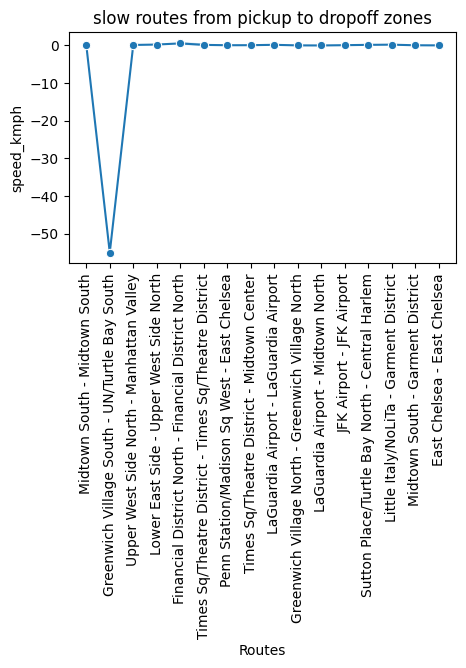

In [3194]:

plt.figure(figsize=[5,3])
sns.lineplot(data=slow_routes, x='Routes', y='speed_kmph', marker='o')
plt.title('slow routes from pickup to dropoff zones')
plt.xticks(rotation=90)

plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

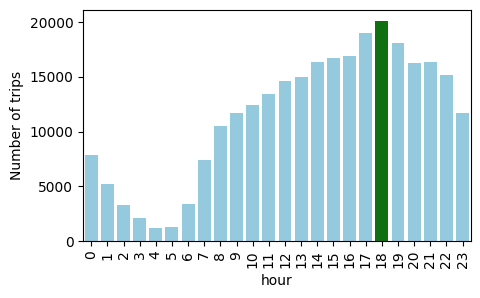

In [3200]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=[5,3])
hourly_data = df['hour'].value_counts().sort_index()
busiest_hour = hourly_data.idxmax()
busiest_count = hourly_data.max()
colors = ['green' if hour==busiest_hour else 'skyblue' for hour in hourly_data.index]
sns.barplot(x=hourly_data.index, y=hourly_data.values, palette=colors)
plt.ylabel('Number of trips')
plt.xticks(rotation=90)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [3066]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = df['hour'].value_counts().head().sum()
sample_fraction

90860

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [3204]:
# Compare traffic trends for the week days and weekends

custom_weekday = ['Monday', 'Tuesday','Wednesday','Thursday','Friday']
sorted_week_hour = df[['pickup_days_of_the_week', 'hour']].value_counts().reset_index()
sorted_week_hour = sorted_week_hour[sorted_week_hour['pickup_days_of_the_week'].isin(custom_weekday)]
sorted_week_hour = sorted_week_hour.pivot_table(index='pickup_days_of_the_week', columns ='hour', values='count', aggfunc='sum') 
sorted_week_hour

hour                       0    1    2    3    4    5    6     7     8     9   \
pickup_days_of_the_week                                                         
Friday                   1267  690  379  203  140  196  541  1145  1509  1645   
Monday                    539  262  130   94   83  174  545  1152  1566  1647   
Thursday                  876  413  189  124  106  213  611  1442  2024  2050   
Tuesday                   472  205  100   56   61  196  601  1360  1979  2015   
Wednesday                 698  304  142   83   83  184  621  1455  2056  2095   

hour                     ...    14    15    16    17    18    19    20    21  \
pickup_days_of_the_week  ...                                                   
Friday                   ...  2388  2455  2423  2777  3045  2759  2239  2288   
Monday                   ...  2126  2216  2236  2553  2649  2264  2053  2026   
Thursday                 ...  2496  2633  2580  3081  3349  2979  2746  2834   
Tuesday                  ...  2389  2464  2522  2910  3167  2772  2632  2676   
Wednesday                ...  2505  2522  2604  3069  3313  3015  2801  2865   

hour                       22    23  
pickup_days_of_the_week              
Friday                   2470  2313  
Monday                   1595   959  
Thursday                 2636  1974  
Tuesday                  2195  1436  
Wednesday                2519  1635  

[5 rows x 24 columns]

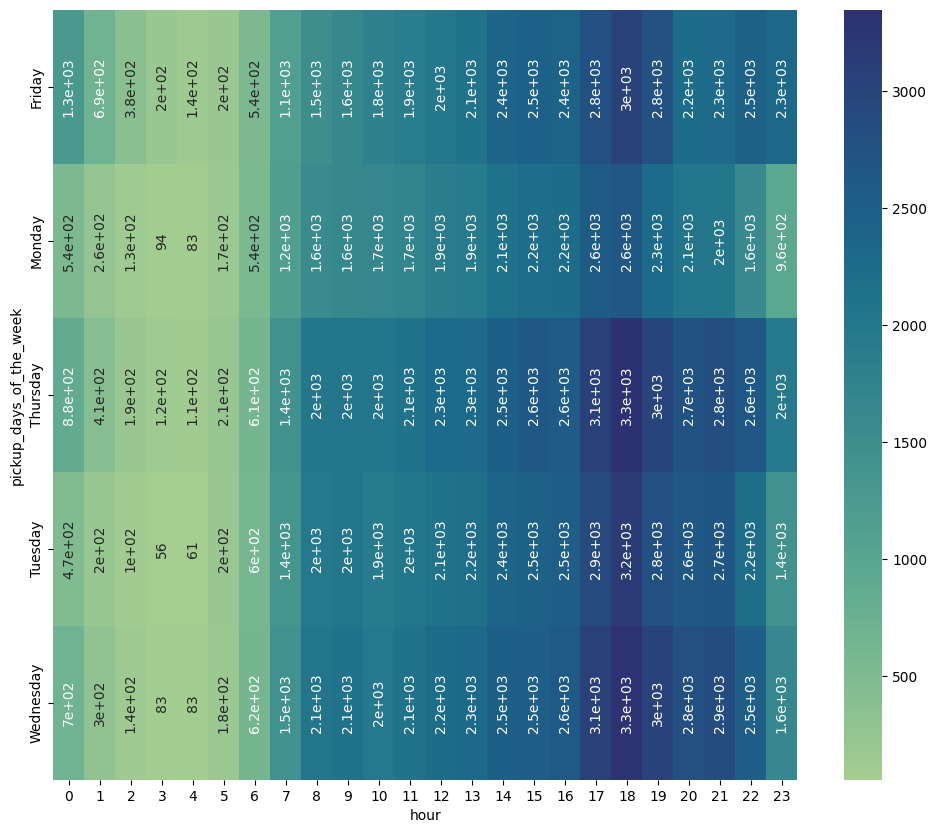

In [3206]:
plt.figure(figsize=[12,10])
ax = sns.heatmap(sorted_week_hour, cmap='crest', annot=True)
for text in ax.texts:
    text.set_rotation(90) 
plt.show()

In [3072]:
# for weekends
custom_weekend = ['Saturday', 'Sunday']
sorted_week_hour = df[['pickup_days_of_the_week', 'hour']].value_counts().reset_index()
sorted_week_hour = sorted_week_hour[sorted_week_hour['pickup_days_of_the_week'].isin(custom_weekend)]
sorted_week_hour = sorted_week_hour.pivot_table(index='pickup_days_of_the_week', columns ='hour', values='count', aggfunc='sum') 
sorted_week_hour

hour                       0     1     2    3    4    5    6    7    8     9   \
pickup_days_of_the_week                                                         
Saturday                 2000  1624  1175  711  329  115  261  430  711  1231   
Sunday                   2044  1744  1201  839  397  169  243  399  622  1039   

hour                     ...    14    15    16    17    18    19    20    21  \
pickup_days_of_the_week  ...                                                   
Saturday                 ...  2233  2301  2368  2493  2551  2464  2085  2117   
Sunday                   ...  2181  2142  2147  2154  2037  1846  1708  1599   

hour                       22    23  
pickup_days_of_the_week              
Saturday                 2399  2372  
Sunday                   1323   998  

[2 rows x 24 columns]

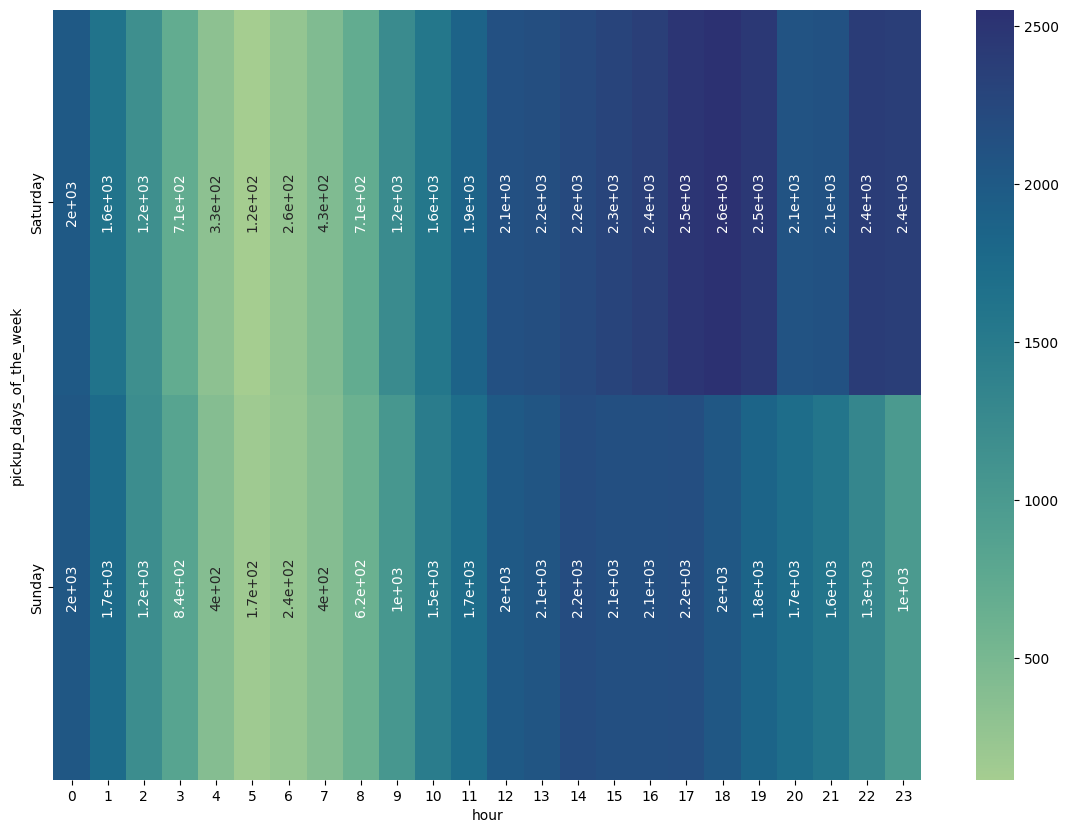

In [3074]:
plt.figure(figsize=[14,10])
ax = sns.heatmap(sorted_week_hour, cmap='crest', annot=True)
for text in ax.texts:
    text.set_rotation(90) 
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [3076]:
# Find top 10 pickup and dropoff zones

hourly_pickup = df[['PULocationID', 'hour']].value_counts().reset_index()
hourly_pickup = hourly_pickup['PULocationID'].unique()[:10]
print("Top 10 pickup zones: \n",hourly_pickup)

hourly_dropoff = df[['DOLocationID', 'hour']].value_counts().reset_index()
hourly_dropoff = hourly_dropoff['DOLocationID'].unique()[:10]
print("Top 10 dropoff zones: \n",hourly_dropoff)

Top 10 pickup zones: 
 [161 237 236 132 162 163 142 138 170 234]
Top 10 dropoff zones: 
 [236 237 161 142 239 230 141 162  79 238]


In [3078]:
pickup_count = zones[zones['LocationID'].isin(hourly_pickup)][['zone', 'NumberofTrips']]
pickup_count.columns=['zone', 'pickup_count']
dropoff_count = zones[zones['LocationID'].isin(hourly_dropoff)][['zone', 'NumberofTrips']]
dropoff_count.columns=['zone', 'dropoff_count']
merged_data = pickup_count.merge(dropoff_count, on='zone', how='outer').fillna(0)
melted_data = merged_data.melt(id_vars='zone', value_vars=['pickup_count', 'dropoff_count'],
                                var_name='type', value_name='count')
melted_data

zone           type    count
0                East Village   pickup_count      0.0
1                 JFK Airport   pickup_count  12667.0
2           LaGuardia Airport   pickup_count  10119.0
3             Lenox Hill West   pickup_count      0.0
4         Lincoln Square East   pickup_count   9532.0
5              Midtown Center   pickup_count  13201.0
6                Midtown East   pickup_count  10493.0
7               Midtown North   pickup_count   8104.0
8                 Murray Hill   pickup_count   8481.0
9   Times Sq/Theatre District   pickup_count      0.0
10                   Union Sq   pickup_count   7936.0
11      Upper East Side North   pickup_count  12565.0
12      Upper East Side South   pickup_count  13859.0
13      Upper West Side North   pickup_count      0.0
14      Upper West Side South   pickup_count      0.0
15               East Village  dropoff_count   6866.0
16                JFK Airport  dropoff_count      0.0
17          LaGuardia Airport  dropoff_count      0.0
18            Lenox Hill West  dropoff_count   6943.0
19        Lincoln Square East  dropoff_count   9532.0
20             Midtown Center  dropoff_count  13201.0
21               Midtown East  dropoff_count  10493.0
22              Midtown North  dropoff_count      0.0
23                Murray Hill  dropoff_count      0.0
24  Times Sq/Theatre District  dropoff_count   8718.0
25                   Union Sq  dropoff_count      0.0
26      Upper East Side North  dropoff_count  12565.0
27      Upper East Side South  dropoff_count  13859.0
28      Upper West Side North  dropoff_count   5490.0
29      Upper West Side South  dropoff_count   8139.0

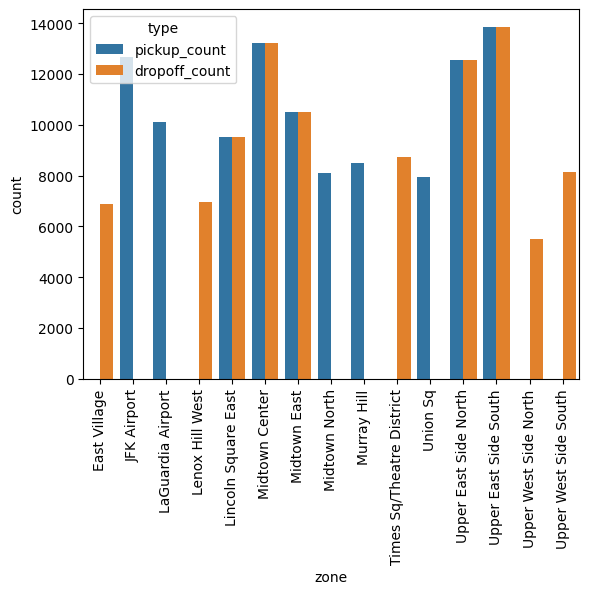

In [3080]:
sns.barplot(melted_data, x='zone', y='count', hue='type')
plt.xticks(rotation=90)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

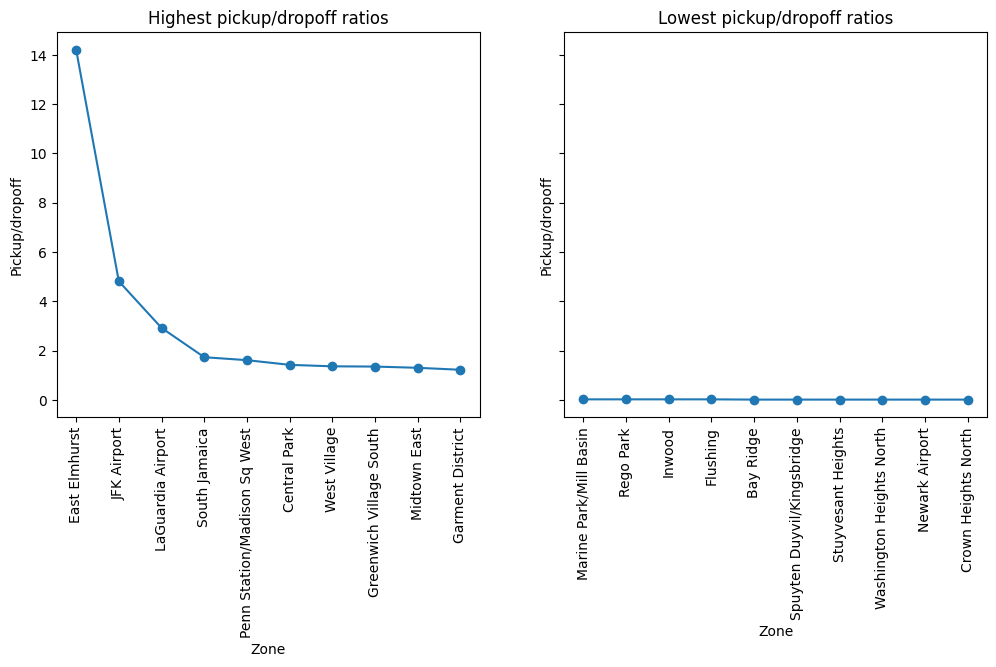

In [3214]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_data = df['PULocationID'].value_counts().reset_index()
dropoff_data = df['DOLocationID'].value_counts().reset_index()
pickup_data = pickup_data.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
dropoff_data = dropoff_data.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')
merged_data = pickup_data.merge(dropoff_data, how='inner', left_on='PULocationID', right_on='DOLocationID')
merged_data.drop(columns=['DOLocationID','OBJECTID_x','OBJECTID_y','Shape_Leng_x','Shape_Leng_y','Shape_Area_x','Shape_Area_y',
                         'LocationID_x','LocationID_y','borough_x','borough_y','geometry_x','geometry_y','NumberofTrips_x','NumberofTrips_y',
                         'zone_y'], inplace=True)
merged_data.rename(columns={'PULocationID':'LocationID', 'count_x': 'Number_of_Pickup', 'count_y': 'Number_of_Dropoff', 'zone_x':'zone'}, inplace=True)
merged_data['Pickup_dropoff_ratio'] = round(merged_data['Number_of_Pickup']/merged_data['Number_of_Dropoff'],2)
merged_data.sort_values(by='Pickup_dropoff_ratio', ascending=False, inplace=True)

top_10_ratio = merged_data.head(10)
bottom_10_ratio = merged_data.tail(10)

fig, ax = plt.subplots(1,2, figsize=(12,5),sharey=True)
ax[0].plot(top_10_ratio['zone'], top_10_ratio['Pickup_dropoff_ratio'], marker='o')
ax[0].set_title('Highest pickup/dropoff ratios')
ax[0].set_xlabel('Zone')
ax[0].set_ylabel('Pickup/dropoff')
ax[0].tick_params(axis='x', rotation=90)

ax[1].plot(bottom_10_ratio['zone'], bottom_10_ratio['Pickup_dropoff_ratio'], marker='o')
ax[1].set_title('Lowest pickup/dropoff ratios')
ax[1].set_xlabel('Zone')
ax[1].set_ylabel('Pickup/dropoff')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [3084]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[df['hour'].isin([0,1,2,3,4,5,23])][['hour', 'zone', 'PULocationID', 'DOLocationID']]

top_10_pickup_night_zones = night_df['PULocationID'].value_counts().reset_index().head(10)
top_10_pickup_night_zones = top_10_pickup_night_zones.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
top_10_dropoff_night_zones = night_df[['DOLocationID']].value_counts().reset_index().head(10)
top_10_dropoff_night_zones = top_10_dropoff_night_zones.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')

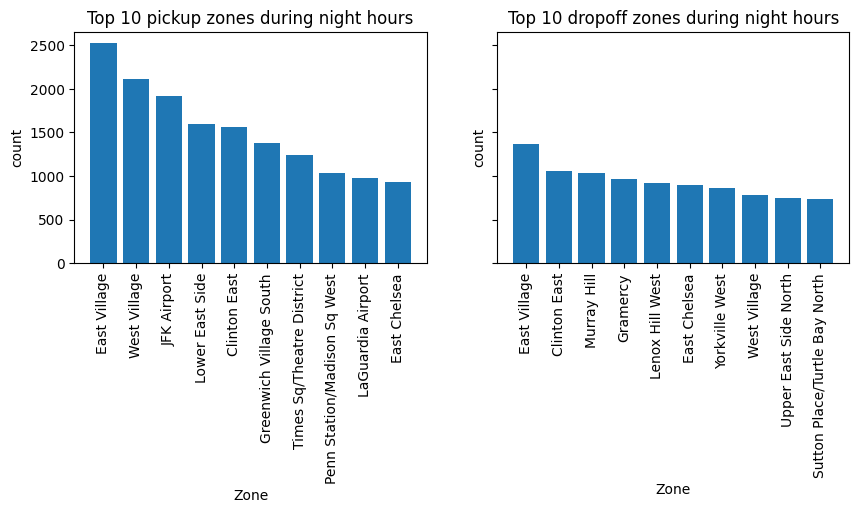

In [3218]:
fig, ax = plt.subplots(1,2, figsize=(10,3),sharey=True)
ax[0].bar(top_10_pickup_night_zones['zone'], top_10_pickup_night_zones['count'])
ax[0].set_title('Top 10 pickup zones during night hours')
ax[0].set_xlabel('Zone')
ax[0].set_ylabel('count')
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(top_10_dropoff_night_zones['zone'], top_10_dropoff_night_zones['count'])
ax[1].set_title('Top 10 dropoff zones during night hours')
ax[1].set_xlabel('Zone')
ax[1].set_ylabel('count')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [3088]:
# Filter for night hours (11 PM to 5 AM)

night_revenue = df[df['hour'].isin([0,1,2,3,4,5,23])][['total_amount']].sum()
print("REVENUE SHARE NIGHTIME:", night_revenue)
day_revenue = df[~df['hour'].isin([0,1,2,3,4,5,23])][['total_amount']].sum()
print("REVENUE SHARE DAYIME:", day_revenue)

REVENUE SHARE NIGHTIME: total_amount    979455.2
dtype: float64
REVENUE SHARE DAYIME: total_amount    7169532.89
dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [3090]:
# Analyse the fare per mile per passenger for different passenger counts
new_df = df[['passenger_count', 'trip_distance', 'total_amount']]
new_df['fare_per_mile'] = round(new_df['total_amount']/new_df['trip_distance'],2)
new_df['fare_per_mile_per_passenger'] = round(new_df['fare_per_mile']/new_df['passenger_count'],2)

new_df.groupby(by='passenger_count').agg(avg_fare_per_mile_per_passenger=('fare_per_mile_per_passenger', 'mean'))

avg_fare_per_mile_per_passenger
passenger_count                                 
1.0                                    14.943549
2.0                                     8.293445
3.0                                     5.904416
4.0                                     4.807503
5.0                                     2.576882
6.0                                     2.129066

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

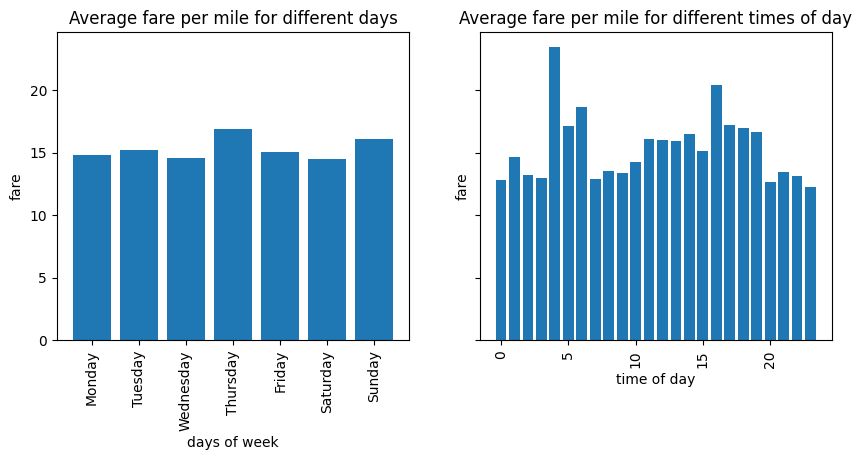

In [3224]:
# Compare the average fare per mile for different days and for different times of the day

new_df = df[['trip_distance', 'total_amount', 'hour', 'pickup_days_of_the_week']]
new_df['fare_per_mile'] = round(new_df['total_amount']/new_df['trip_distance'],2)
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_per_day = new_df.groupby(by='pickup_days_of_the_week').agg(avg_fare_per_mile_per_day=('fare_per_mile', 'mean'))
fare_per_day = fare_per_day.reindex([day for day in custom_order if day in fare_per_day.index])
fare_per_day.reset_index(inplace=True)
fare_per_hour = new_df.groupby(by='hour').agg(avg_fare_per_mile_per_hour=('fare_per_mile', 'mean')).reset_index()

fig, ax = plt.subplots(1,2, figsize=(10,4),sharey=True)
ax[0].bar(fare_per_day['pickup_days_of_the_week'], fare_per_day['avg_fare_per_mile_per_day'])
ax[0].set_title('Average fare per mile for different days')
ax[0].set_xlabel('days of week')
ax[0].set_ylabel('fare')
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(fare_per_hour['hour'], fare_per_hour['avg_fare_per_mile_per_hour'])
ax[1].set_title('Average fare per mile for different times of day')
ax[1].set_xlabel('time of day')
ax[1].set_ylabel('fare')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

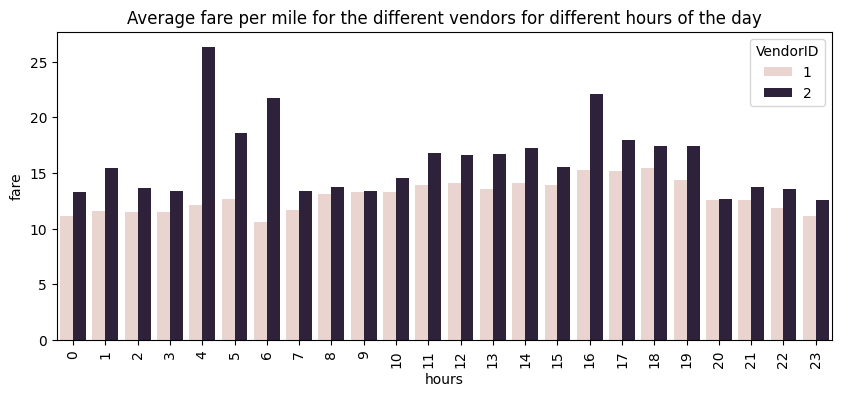

In [3230]:
new_df = df[['trip_distance', 'total_amount', 'VendorID', 'hour']]
new_df['fare_per_mile'] = round(new_df['total_amount']/new_df['trip_distance'],2)
fare_per_day = new_df.groupby(by=['VendorID', 'hour']).agg(avg_fare_per_mile_per_hour=('fare_per_mile', 'mean')).reset_index()

plt.figure(figsize=[10,4])
sns.barplot(data=fare_per_day, x='hour', y='avg_fare_per_mile_per_hour', hue='VendorID')
plt.title('Average fare per mile for the different vendors for different hours of the day')
plt.xlabel('hours')
plt.ylabel('fare')
plt.xticks(rotation=90)

plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


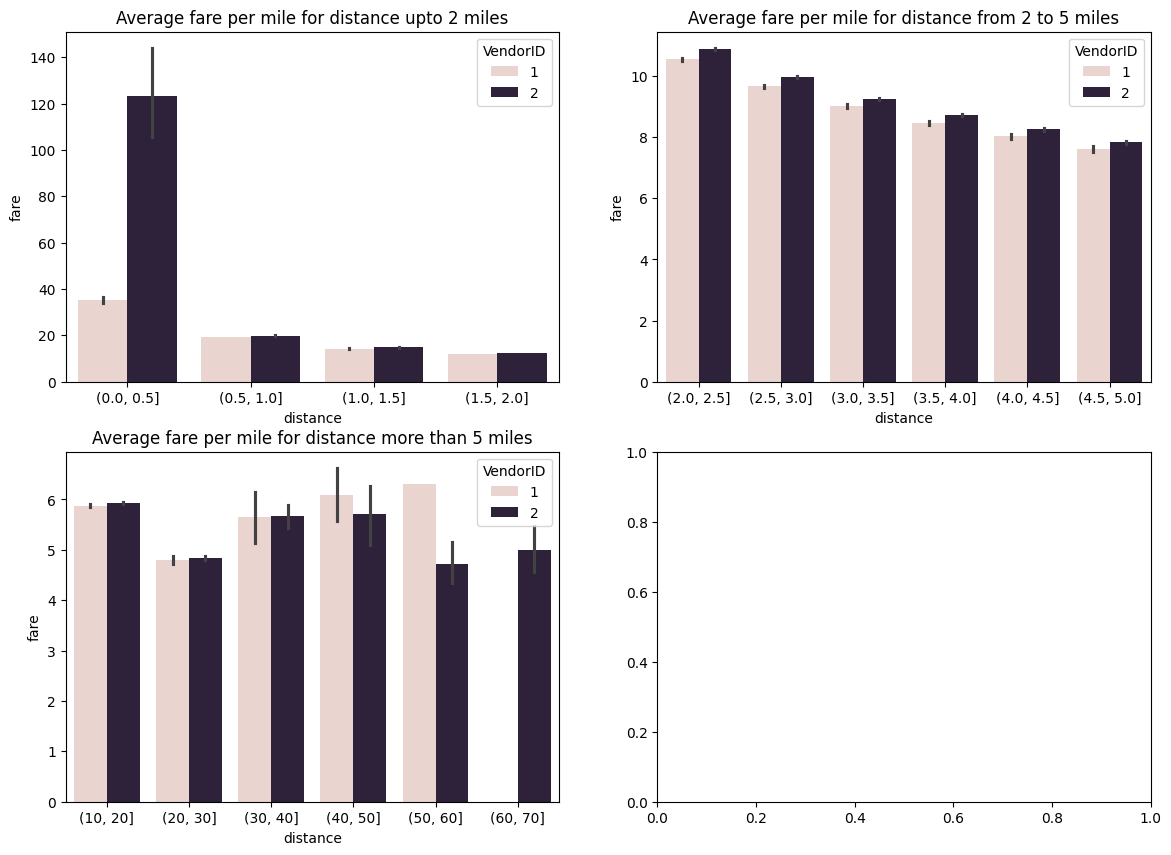

In [3276]:
# Defining distance tiers

new_df = df[['trip_distance', 'total_amount', 'VendorID']]
new_df['fare_per_mile'] = round(new_df['total_amount']/new_df['trip_distance'],2)

distance_2_miles = new_df[new_df['trip_distance']<=2]
distance_2_miles['distance_bin'] = pd.cut(distance_2_miles['trip_distance'],bins=[0, 0.5, 1, 1.5, 2])
distance_2to5_miles = new_df[(new_df['trip_distance']>2) & (new_df['trip_distance']<=5)]
distance_2to5_miles['distance_bin'] = pd.cut(distance_2to5_miles['trip_distance'],bins=[2, 2.5, 3, 3.5, 4, 4.5,5])
distance_more_than_5_miles = new_df[new_df['trip_distance']>5]
distance_more_than_5_miles['distance_bin'] = pd.cut(distance_more_than_5_miles['trip_distance'],bins=[10, 20, 30, 40, 50, 60,70])

fig, ax = plt.subplots(2,2, figsize=(14,10))
sns.barplot(data=distance_2_miles,x='distance_bin',y='fare_per_mile',hue='VendorID',ax=ax[0][0])
ax[0][0].set_title('Average fare per mile for distance upto 2 miles')
ax[0][0].set_xlabel('distance')
ax[0][0].set_ylabel('fare')

sns.barplot(data=distance_2to5_miles,x='distance_bin',y='fare_per_mile',hue='VendorID',ax=ax[0][1])
ax[0][1].set_title('Average fare per mile for distance from 2 to 5 miles')
ax[0][1].set_xlabel('distance')
ax[0][1].set_ylabel('fare')

sns.barplot(data=distance_more_than_5_miles,x='distance_bin',y='fare_per_mile',hue='VendorID',ax=ax[1][0])
ax[1][0].set_title('Average fare per mile for distance more than 5 miles')
ax[1][0].set_xlabel('distance')
ax[1][0].set_ylabel('fare')

plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

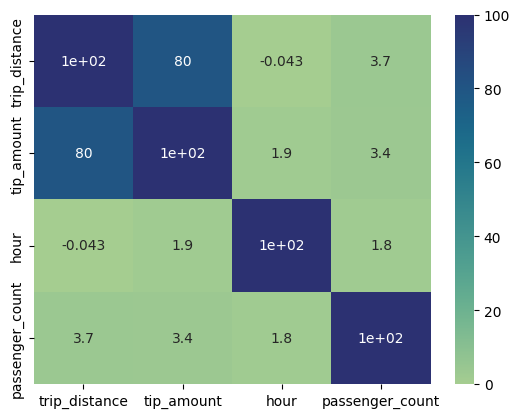

In [3098]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

new_df = df[['trip_distance','tip_amount','hour', 'passenger_count']]
tip_distance_avg = new_df.groupby(by=['trip_distance']).agg(avg_tip=('tip_amount','mean')).reset_index()

tip_passenger_count_avg = new_df.groupby(by=['passenger_count']).agg(avg_tip=('tip_amount','mean')).reset_index()

tip_time_avg = new_df.groupby(by=['hour']).agg(avg_tip=('tip_amount','mean')).reset_index()

sns.heatmap(new_df.corr()*100, cmap='crest', annot=True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

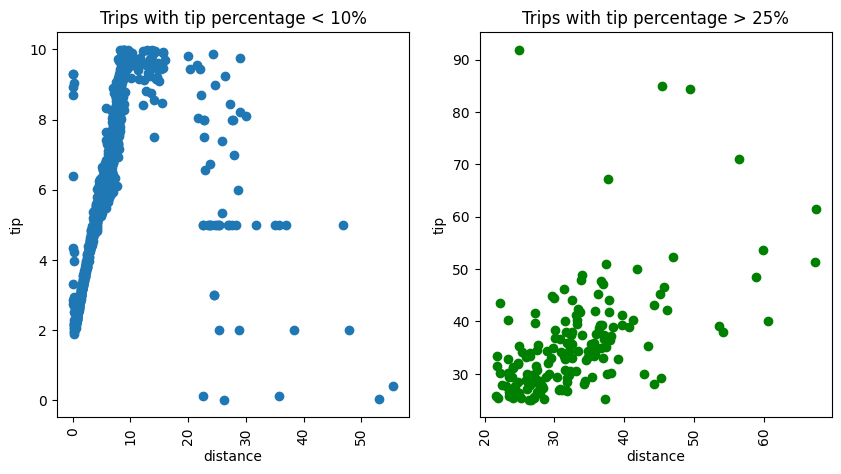

In [3100]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_less_than_10 = tip_distance_avg[tip_distance_avg['avg_tip']<10]
tip_more_than_25 = tip_distance_avg[tip_distance_avg['avg_tip']>25]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(tip_less_than_10['trip_distance'],tip_less_than_10['avg_tip'])
ax[0].set_title('Trips with tip percentage < 10%')
ax[0].set_xlabel('distance')
ax[0].set_ylabel('tip')
ax[0].tick_params(axis='x', rotation=90)

ax[1].scatter(tip_more_than_25['trip_distance'], tip_more_than_25['avg_tip'], color='green')
ax[1].set_title('Trips with tip percentage > 25%')
ax[1].set_xlabel('distance')
ax[1].set_ylabel('tip')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

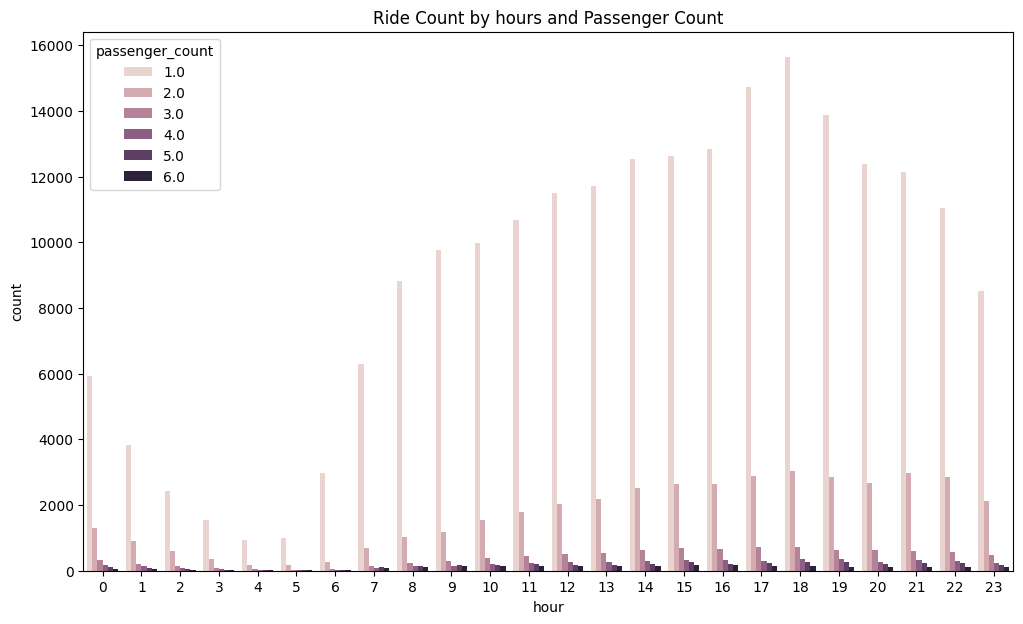

In [3284]:
# See how passenger count varies across hours and days

new_df = df[['hour', 'passenger_count']]
passenger_count_hour = new_df[['passenger_count', 'hour']].value_counts().reset_index()
plt.figure(figsize=[12,7])
sns.barplot(x=passenger_count_hour['hour'], y=passenger_count_hour['count'], hue=passenger_count_hour['passenger_count'])
plt.title('Ride Count by hours and Passenger Count')
plt.show()

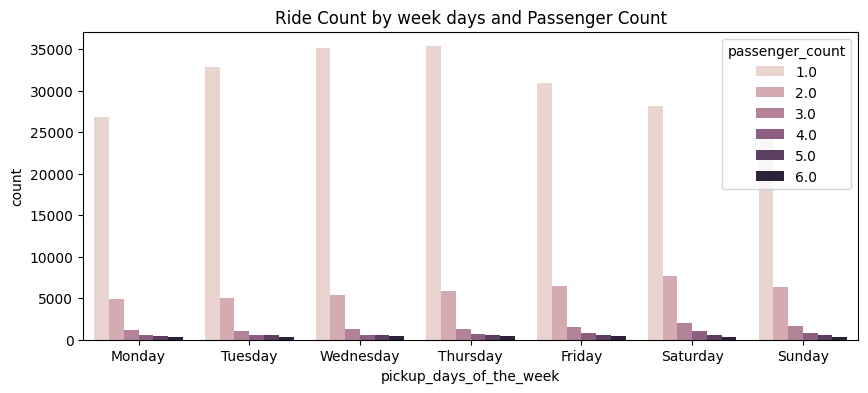

In [3282]:
# See how passenger count varies across days
new_df = df[['pickup_days_of_the_week', 'passenger_count']]
custom_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_count_day = new_df[['passenger_count', 'pickup_days_of_the_week']].value_counts()
passenger_count_day = passenger_count_day.reset_index()
passenger_count_day['pickup_days_of_the_week'] = pd.Categorical(
    passenger_count_day['pickup_days_of_the_week'],
    categories=custom_order,
    ordered=True
)
passenger_count_day = passenger_count_day.sort_values(by=['pickup_days_of_the_week', 'passenger_count'])
plt.figure(figsize=[10,4])
sns.barplot(x=passenger_count_day['pickup_days_of_the_week'], y=passenger_count_day['count'], hue=passenger_count_day['passenger_count'])
plt.title('Ride Count by week days and Passenger Count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

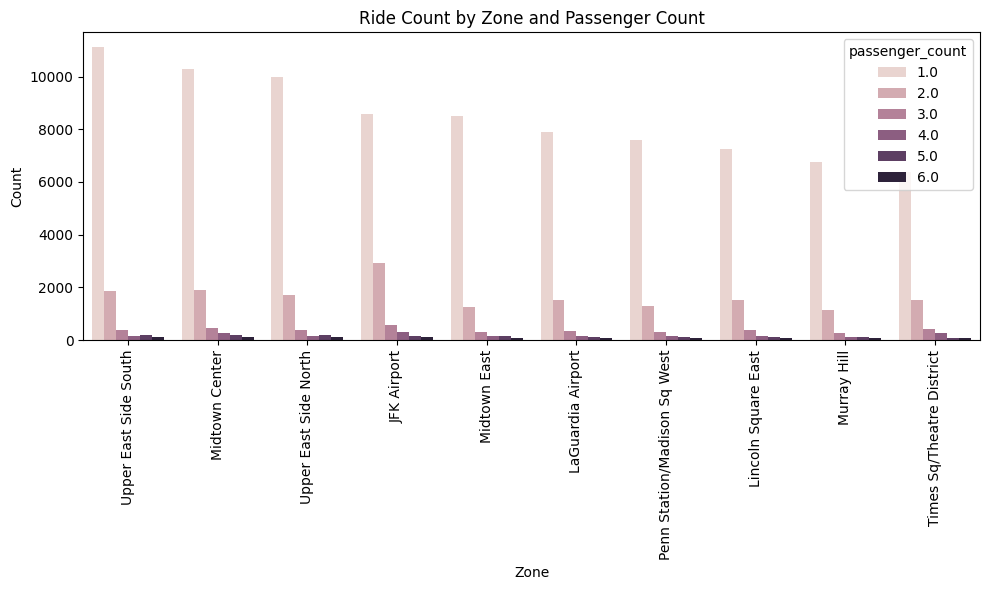

In [3104]:
# How does passenger count vary across zones (visualizing for only top 10 zones)

new_df = df[['zone', 'passenger_count']]
passenger_count_zone = new_df[['zone','passenger_count']].value_counts().reset_index()
top_10_zones = zones.sort_values(by='NumberofTrips', ascending=False).head(10)
top_10_zones = top_10_zones['zone']

passenger_count_zone = passenger_count_zone[passenger_count_zone['zone'].isin(top_10_zones)]

plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_count_zone, x='zone', y='count', hue='passenger_count')
plt.title('Ride Count by Zone and Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

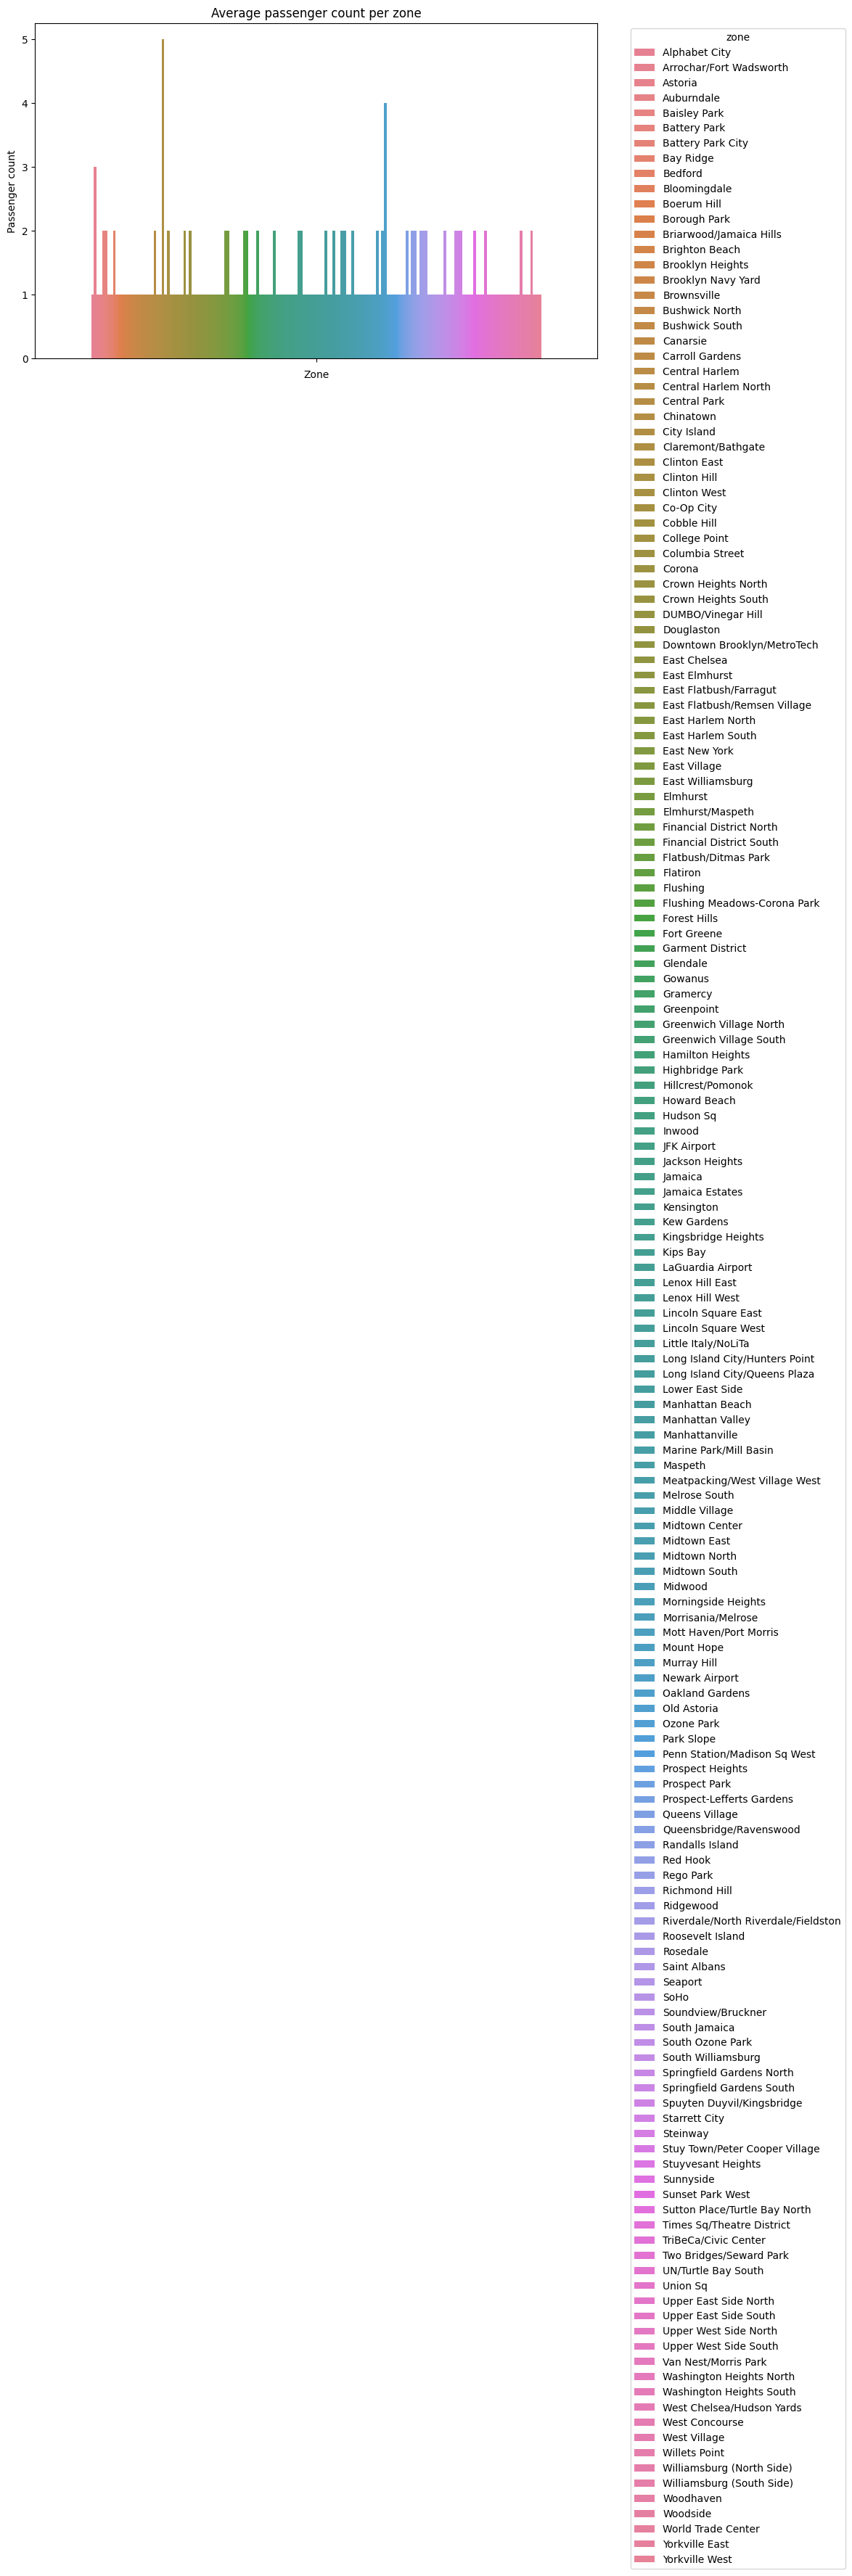

In [3106]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

new_df = df[['zone', 'passenger_count']]
passenger_count_zone = new_df.groupby(by='zone').agg(average_passenger_count=('passenger_count','mean')).round()

plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_count_zone, y='average_passenger_count', hue='zone')
plt.title('Average passenger count per zone')
plt.xlabel('Zone')
plt.ylabel('Passenger count')
plt.legend(title='zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

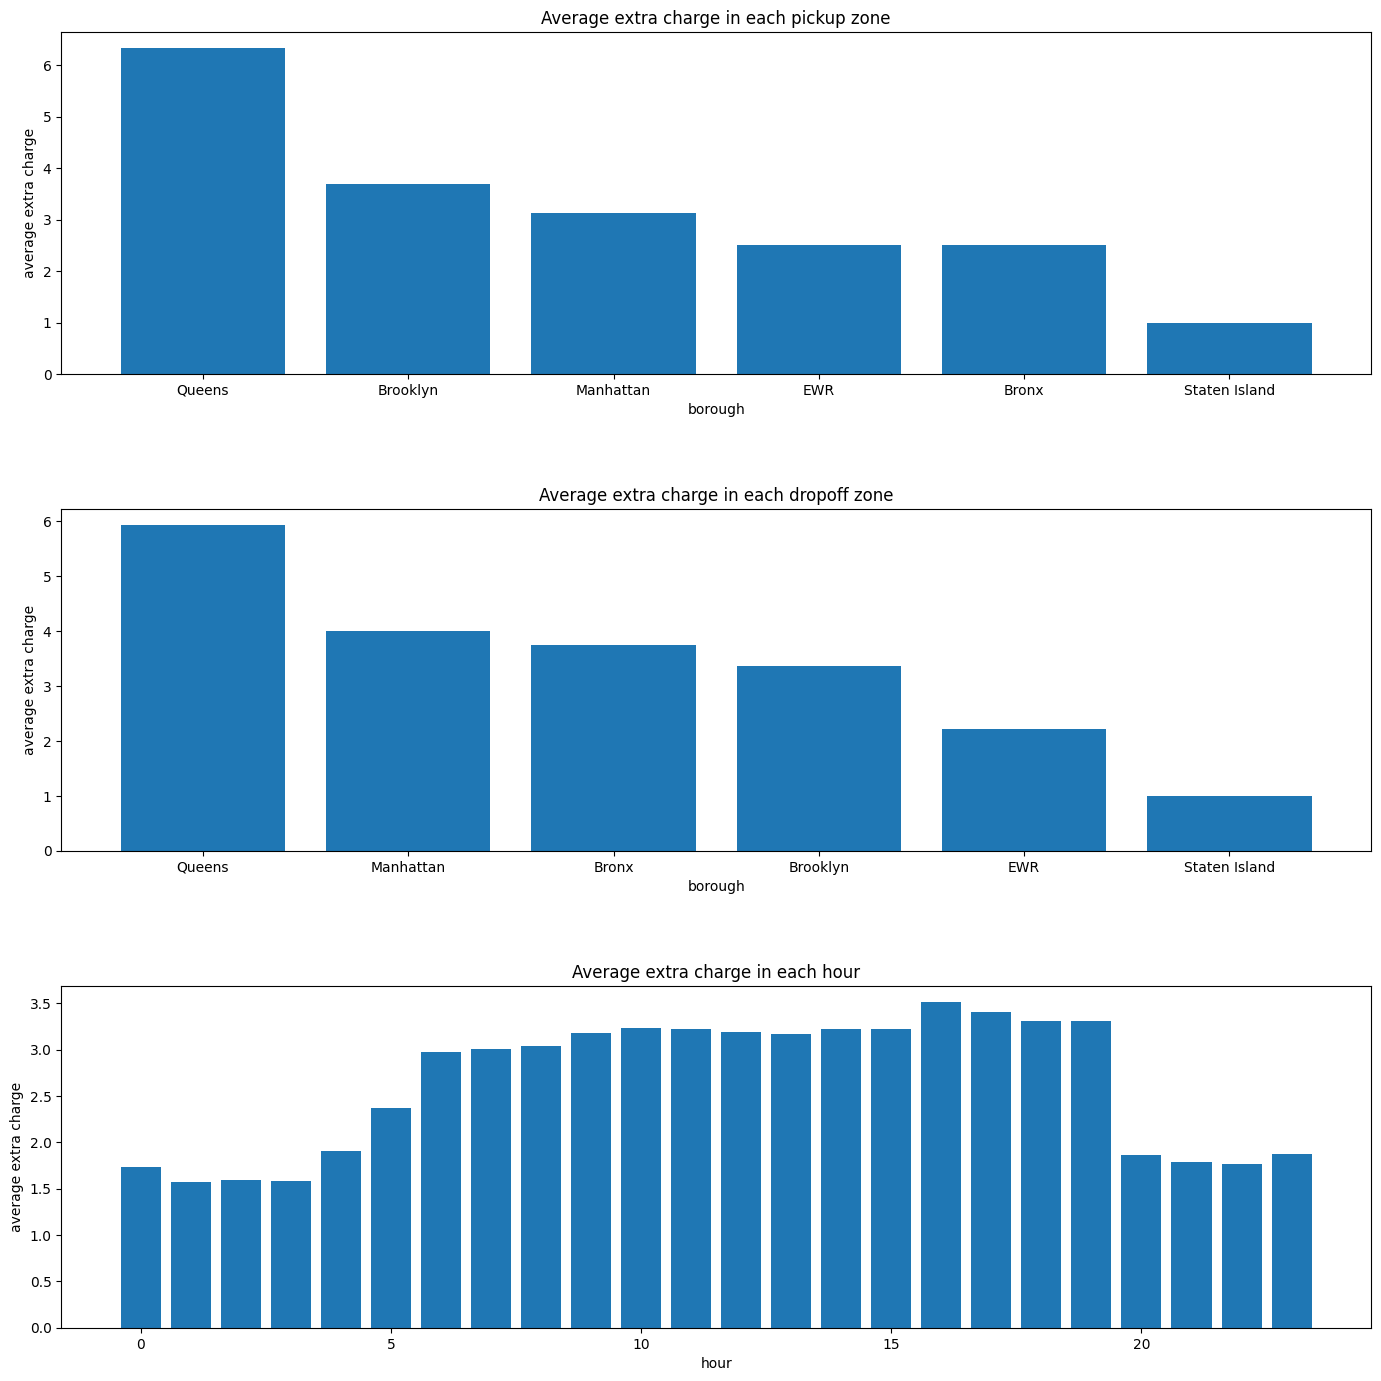

In [3108]:
# How often is each surcharge applied?

new_df = df[df['extra']>0]
pickup_extra = new_df.groupby('PULocationID').agg(avg_extra_charge=('extra','mean')).sort_values(by='avg_extra_charge', ascending=False)
pickup_extra = pickup_extra.merge(zones[['zone', 'LocationID', 'borough']], how='inner', left_on='PULocationID', right_on = 'LocationID')

dropoff_extra = new_df.groupby('DOLocationID').agg(avg_extra_charge=('extra','mean')).sort_values(by='avg_extra_charge', ascending=False)
dropoff_extra = dropoff_extra.merge(zones[['zone', 'LocationID', 'borough']], how='inner', left_on='DOLocationID', right_on = 'LocationID')

hour_extra = new_df.groupby('hour').agg(avg_extra_charge=('extra','mean')).sort_values(by='avg_extra_charge', ascending=False).reset_index()

fig, ax = plt.subplots(3,1, figsize=(15,15))
ax[0].bar(pickup_extra['borough'], pickup_extra['avg_extra_charge'])
ax[0].set_title('Average extra charge in each pickup zone')
ax[0].set_xlabel('borough')
ax[0].set_ylabel('average extra charge')

ax[1].bar(dropoff_extra['borough'], dropoff_extra['avg_extra_charge'])
ax[1].set_title('Average extra charge in each dropoff zone')
ax[1].set_xlabel('borough')
ax[1].set_ylabel('average extra charge')

ax[2].bar(hour_extra['hour'], hour_extra['avg_extra_charge'])
ax[2].set_title('Average extra charge in each hour')
ax[2].set_xlabel('hour')
ax[2].set_ylabel('average extra charge')
plt.tight_layout(pad=5)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# dispatch more vehicles in zones where the pickup frequency is highest like (Upper East Side South, 
# Midtown Center, JFK Airport, Upper East Side North, Midtown East, LaGuardia Airport, Lincoln Square East, Penn Station/Madison Sq West, 
# Times Sq/Theatre District, Murray Hill).

# Identify short distance trips (less than 2 miles) where the idle time is high and fare is low and dispatch more cabs nearby.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# In the top 10 pick up zones (Upper East Side South, Midtown Center, JFK Airport, Upper East Side North, Midtown East,
# LaGuardia Airport, Lincoln Square East, Penn Station/Madison Sq West, Times Sq/Theatre District, Murray Hill) 
# we need to deploy more cabs during evening hours from 5pm to 7pm everyday.
# Since on Thursday we get the maximum traffic we can deploy more cabs in the above zones.
# For months like march, April, may, June. october, nov and dec, we experience more traffic so we can deploy more cabs in those months too.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Lean hours: fare low to attract maximum customers.
# Peak hours: fare same or competitive to attract maximum customers.